## 3.0 EXPLORATIVE DATA ANALYSIS

In [25]:
# Importing relevant libraries
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import re
from pandas.plotting import scatter_matrix

# Machine Learning libraries
import sklearn
from sklearn import svm, datasets
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('mass_mobilization_cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15076 entries, 0 to 15075
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   region                        15076 non-null  object
 1   country                       15076 non-null  object
 2   year                          15076 non-null  int64 
 3   start_date                    15076 non-null  object
 4   end_date                      15076 non-null  object
 5   protest_duration              15076 non-null  int64 
 6   participants_numeric          15076 non-null  int64 
 7   protesterviolence             15076 non-null  int64 
 8   protesteridentity             15076 non-null  object
 9   demand_labor wage dispute     15076 non-null  int64 
 10  demand_land farm issue        15076 non-null  int64 
 11  demand_police brutality       15076 non-null  int64 
 12  demand_political behavior     15076 non-null  int64 
 13  demand_price inc

In [4]:
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
data['end_date'] = pd.to_datetime(data['end_date'], errors='coerce')

Convert the start_date and end_date columnns in the database for further analysis.

### 3.1 UNIVARIATE ANALYSIS

Univariate analysis is a statistical technique that examines the distribution and characteristics of a single variable. Its primary purpose is to describe and summarize data to identify patterns and gain insights.

In [5]:
# Get summary statistics for numeric columns
summary_stats = data.describe()
summary_stats

,year,protest_duration,participants_numeric,protesterviolence,demand_labor wage dispute,demand_land farm issue,demand_police brutality,demand_political behavior,demand_price increases,demand_process,demand_removal of politician,demand_social restrictions,demand_tax policy,response_accomodation,response_arrests,response_beatings,response_crowd dispersal,response_ignore,response_killings,response_shootings
count,15076.000000,15076.000000,1.507600e+04,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000
mean,2006.301008,1.560029,1.981867e+04,0.264659,0.145264,0.038405,0.072300,0.705161,0.093062,0.705161,0.123773,0.044972,0.093062,0.099761,0.141019,0.052666,0.312815,0.543977,0.054059,0.061223
std,8.951656,15.061353,1.569393e+05,0.441166,0.352378,0.192179,0.258993,0.455986,0.290529,0.455986,0.329333,0.207250,0.290529,0.299691,0.348053,0.223374,0.463655,0.498079,0.226142,0.239747
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,0.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,0.000000,5.000000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,938.000000,7.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The summary statistics provided offers a detailed look at the central tendency, dispersion, and range of each variable in the dataset. Here’s an interpretation of each column:

**Year**
Count: 15,076 protests recorded.

Mean: The average year of protests is 2006.3.

Std: The standard deviation is 8.95 years, indicating variability around the mean year.

Min: The earliest recorded protest is in 1990.

25% (Q1): 25% of protests occurred before 1999.

50% (Median): The median year of protests is 2007.

75% (Q3): 75% of protests occurred before 2014.

Max: The latest recorded protest is in 2020.

**Protest Duration**
Count: 15,076 protests recorded.
Mean: The average protest duration is 1.56 days.
Std: The standard deviation is 15.06 days, indicating high variability.
Min: Some protests lasted 0 days (likely indicating same-day protests).
25% (Q1): 25% of protests lasted 0 days.
50% (Median): The median protest duration is 0 days.
75% (Q3): 75% of protests lasted 0 days.
Max: The longest protest lasted 938 days.

**Participants Numeric**
Count: 15,076 protests recorded.

Mean: The average number of participants is 19,818.67.

Std: The standard deviation is 156,939.3, indicating significant variability.

Min: The smallest recorded protest had 1 participant.

25% (Q1): 25% of protests had 100 or fewer participants.

50% (Median): The median number of participants is 500.

75% (Q3): 75% of protests had 5,000 or fewer participants.

Max: The largest recorded protest had 7,000,000 participants.

**Protester Violence**
Count: 15,076 protests recorded.

Mean: On average, about 26.47% of protests involved violence (0.264659).

Std: The standard deviation is 0.441166.

Min: No violence (0) in some protests.

25% (Q1): 25% of protests had no violence.

50% (Median): The median value is 0 (no violence).

75% (Q3): 75% of protests had no violence.

Max: Some protests involved violence (1).

**Demands (Labor Wage Dispute, Land Farm Issue, etc.)**
For each demand type, the following statistics are provided:

Count: 15,076 protests recorded.

Mean: The proportion of protests with each demand (e.g., labor wage dispute mean is 0.145264, indicating about 14.53% of protests included this demand).

Std: Standard deviation indicating variability in the presence of each demand.

Min: No (0) demand in some protests.

25% (Q1): 25% of protests did not have this demand.

50% (Median): The median value is 0 (no demand).

75% (Q3): 75% of protests did not have this demand.

Max: Some protests had this demand (1).

**Responses (Accommodation, Arrests, Beatings, etc.)**

For each response type, the following statistics are provided:

Count: 15,076 protests recorded.

Mean: The proportion of protests with each response (e.g., accommodation mean is 0.099761, indicating about 9.98% of protests resulted in accommodation).

Std: Standard deviation indicating variability in the presence of each response.

Min: No (0) response in some protests.

25% (Q1): 25% of protests did not have this response.

50% (Median): The median value is 0 (no response)
.
75% (Q3): 75% of protests did not have this response.

Max: Some protests had this response (1).

**This is a summary interpretation of the above statistics**

1. Protest Duration: Most protests are short-lived, with a median duration of 0 days.
   
2. Participants: The number of participants varies widely, with a median of 500 but a mean of around 19,819, indicating some very large protests.
   
3. Violence: Approximately 26.47% of protests involve violence.
   
4. Demands: The most common demand is political behavior (about 70.52% of protests), while other demands are less frequent.
   
5. Responses: Ignoring the protest is the most common response (about 54.40% of protests), while other responses like killings, shootings, and beatings are less common.

These statistics provide an overview of the typical characteristics of protests and the frequency of various demands and responses.

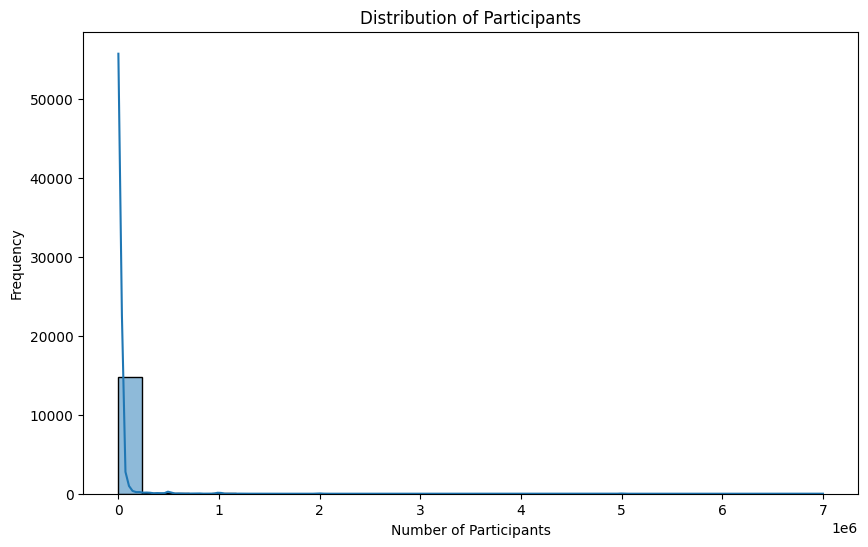

In [6]:
# Plot histogram for participants_numeric
plt.figure(figsize=(10, 6))
sns.histplot(data['participants_numeric'], bins=30, kde=True)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribution of Participants')
plt.xlabel('Number of Participants')
plt.ylabel('Frequency')
plt.show()

This is a line graph showing the distribution of participants by frequency. The y-axis shows the number of participants, while the x-axis shows the frequency. The x-axis goes from 0 to 7, but it  uses scientific notation to represent the largest value (1e6, which means 1,000,000).

Here’s a more detailed interpretation of the graph:

There are very few participants (less than 10,000) who participated in the event 0 to 1 times.
The number of participants increases significantly for those who participated 2 times. There are around 30,000 participants in this category.
The number of participants continues to increase for those who participated 3 and 4 times. There are around 40,000 and 50,000 participants in these categories, respectively.
Participation drops significantly for those who participated 5 times or more. There are less than 10,000 participants in this category.
It is important to note that the exact numbers of participants cannot be determined from the graph as the tick marks on the y-axis are not labeled.

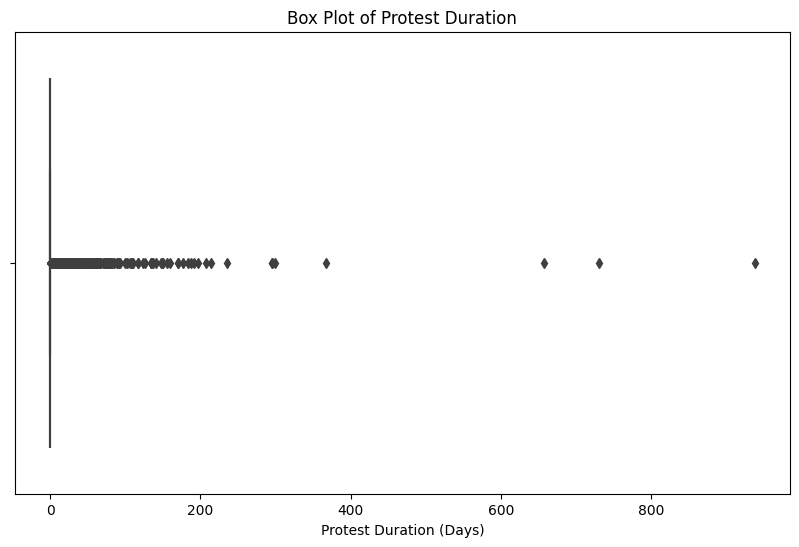

In [7]:
# Plot box plot for protest_duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['protest_duration'])
plt.title('Box Plot of Protest Duration')
plt.xlabel('Protest Duration (Days)')
plt.show()

A box plot is a way to statistically represent the distribution of data. It shows the following:

The center line of the box is the median, which divides the data into two halves. In this case, the median protest duration is around 200 days.
The box contains the middle 50% of the data. The upper edge of the box is the 75th percentile, and the lower edge is the 25th percentile. In this case, 75% of the protests lasted less than 400 days, and 25% of the protests lasted less than 100 days.
The lines extending from the box are called whiskers. The whiskers extend to the most extreme values in the data that are not considered outliers.
Outliers are data points that fall outside of a certain range. In this case, there are outliers on both the left and right side of the plot. The outliers on the left lasted less than 100 days and the outliers on the right lasted more than 600 days.
Overall, the box plot shows that most protests lasted between 100 and 400 days. There is a significant number of protests that lasted less than 100 days and a smaller number that lasted longer than 600 days.

In [8]:
# Frequency distribution of protesterviolence
violence_counts = data['protesterviolence'].value_counts()
violence_counts

0    11086
1     3990
Name: protesterviolence, dtype: int64

The count for the protesterviolence column indicates the number of protests that involved violence (1) and those that did not (0).

Here's a detailed interpretation:

**Protester Violence**

0 (No Violence): 11,086 protests (73.5%) did not involve violence.
1 (Violence): 3,990 protests (26.5%) involved violence.

**Interpretation**

The majority of protests (73.5%) did not involve violence, indicating that most protests were peaceful.
About one-quarter (26.5%) of the protests involved some form of violence.

**Summary**

This data highlights that while a significant portion of protests are non-violent, a notable fraction (over a quarter) involves violence, which is an important aspect to consider when analyzing protest dynamics and responses.

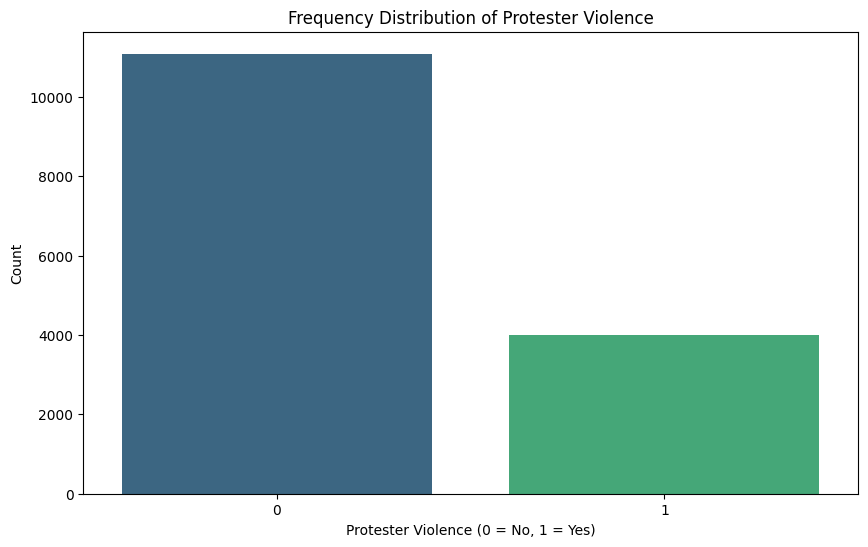

In [9]:
# Plot bar chart for protesterviolence
plt.figure(figsize=(10, 6))
sns.barplot(x=violence_counts.index, y=violence_counts.values, palette='viridis')
plt.title('Frequency Distribution of Protester Violence')
plt.xlabel('Protester Violence (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

This is a bar chart for the frequency distribution of protester violence.

The Y axis represents the number of protesters which starts at 0 and increases to above 10,000.
The X axis categorizes protesters based on their use of violence. It has two bars 0 represents "no violence used" and 1 representing "violence used".

According to the graph we can see the bar of "no violence used" is more than the one where "violence was used".

In [10]:
# Get the unique values in the country column
unique_countries = data['country'].unique()
unique_countries

array(['Canada', 'Cuba', 'Haiti', 'Dominican Republic', 'Jamaica',
       'Mexico', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua',
       'Costa Rica', 'Panama', 'Colombia', 'Venezuela', 'Guyana',
       'Suriname', 'Ecuador', 'Peru', 'Brazil', 'Bolivia', 'Paraguay',
       'Chile', 'Argentina', 'Uruguay', 'United Kingdom', 'Ireland',
       'Netherlands', 'Belgium', 'Luxembourg', 'France', 'Switzerland',
       'Spain', 'Portugal', 'Germany', 'Germany West', 'Germany East',
       'Poland', 'Austria', 'Hungary', 'Czechoslovakia', 'Czech Republic',
       'Slovak Republic', 'Italy', 'Albania', 'Kosovo', 'Serbia',
       'Macedonia', 'Croatia', 'Yugoslavia', 'Bosnia',
       'Serbia and Montenegro', 'Montenegro', 'Slovenia', 'Greece',
       'Cyprus', 'Bulgaria', 'Moldova', 'Romania', 'USSR', 'Russia',
       'Estonia', 'Latvia', 'Lithuania', 'Ukraine', 'Belarus', 'Armenia',
       'Georgia', 'Azerbaijan', 'Finland', 'Sweden', 'Norway', 'Denmark',
       'Cape Verde', 'Guinea-Biss

This is a list of countries in the dataset. This dataset has a geographical diversity as the countries span from North America, South America, Europe, Africa, Asia, and Oceania, reflecting a broad geographic scope in the protest dataset.

In [11]:
# Count of protests by country
country_counts = data['country'].value_counts()
country_counts

United Kingdom    575
France            546
Ireland           431
Germany           364
Kenya             350
                 ... 
Germany West        2
Laos                2
Bhutan              2
Qatar               1
South Sudan         1
Name: country, Length: 166, dtype: int64

These shows the number of protests by country. The highest being United Kingdom which had 575 protests and the lowest being South Sudan having 1 protest.

In [12]:
from IPython.core.display import HTML

# Embed Tableau Public visualization in Jupyter Notebook
HTML("""
<div class='tableauPlaceholder' id='viz1721550756321' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt='Count of protests by country from 1990-2020' src='https://public.tableau.com/static/images/Ca/CapstoneProject_17215496480900/Sheet1/1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz' style='display:none;'>
        <param name='host_url' value='https://public.tableau.com/' />
        <param name='embed_code_version' value='3' />
        <param name='site_root' value='' />
        <param name='name' value='CapstoneProject_17215496480900/Sheet1' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https://public.tableau.com/static/images/Ca/CapstoneProject_17215496480900/Sheet1/1.png' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
        <param name='filter' value='publish=yes' />
    </object>
</div>
<script type='text/javascript'>
    var divElement = document.getElementById('viz1721550756321');
    var vizElement = divElement.getElementsByTagName('object')[0];
    vizElement.style.width='100%';
    vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
    var scriptElement = document.createElement('script');
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>
""")


This is showing the number of protests recorded for each country in the dataset.
Here's a summary interpretation of the data:

**Top Countries by Number of Protests**
United Kingdom: 575 protests
France: 546 protests
Ireland: 431 protests
Germany: 364 protests
Kenya: 350 protests

**Bottom Countries by Number or Protests**
Germany West: 2 protests
Laos: 2 protests
Bhutan: 2 protests
Qatar: 1 protest
South Sudan: 1 protest

**Observations**

Distribution: The counts vary widely, with some countries having hundreds of recorded protests while others have only a few.

Regional Representation: Countries from various continents appear on the list, indicating protests are a global phenomenon.

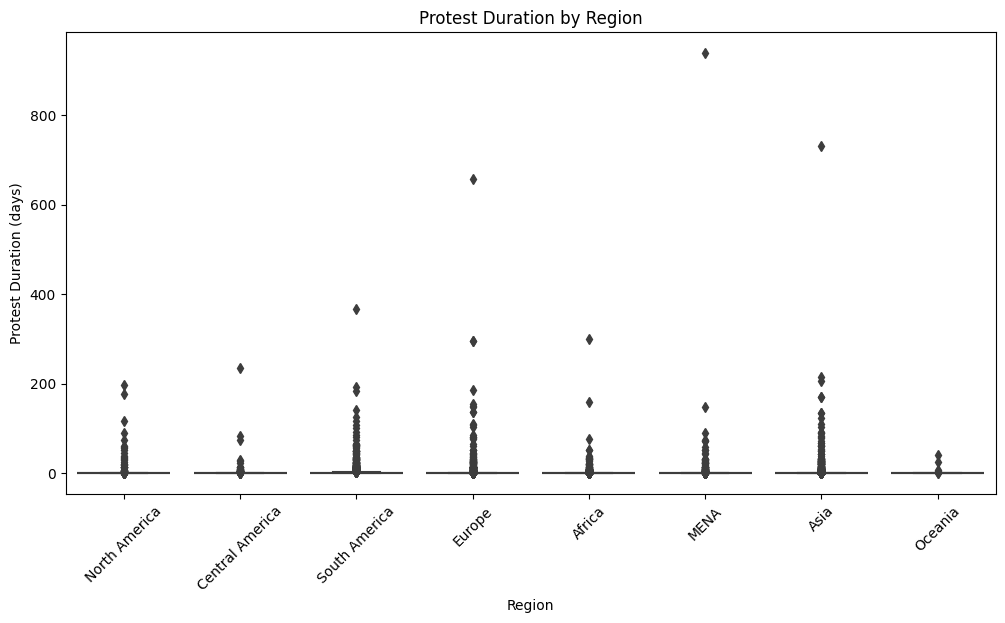

In [13]:
#  Visualize Protest Duration by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='protest_duration', data=data)
plt.title('Protest Duration by Region')
plt.xlabel('Region')
plt.ylabel('Protest Duration (days)')
plt.xticks(rotation=45)
plt.show()

The graph depicting protest durations by region reveals that in most countries, protests lasted from 0 days (indicating they ended on the same day they began) to around 300 days. However, the MENA region notably stands out with protest durations exceeding 800 days, while both Europe and Asia also saw protests lasting over 600 days.

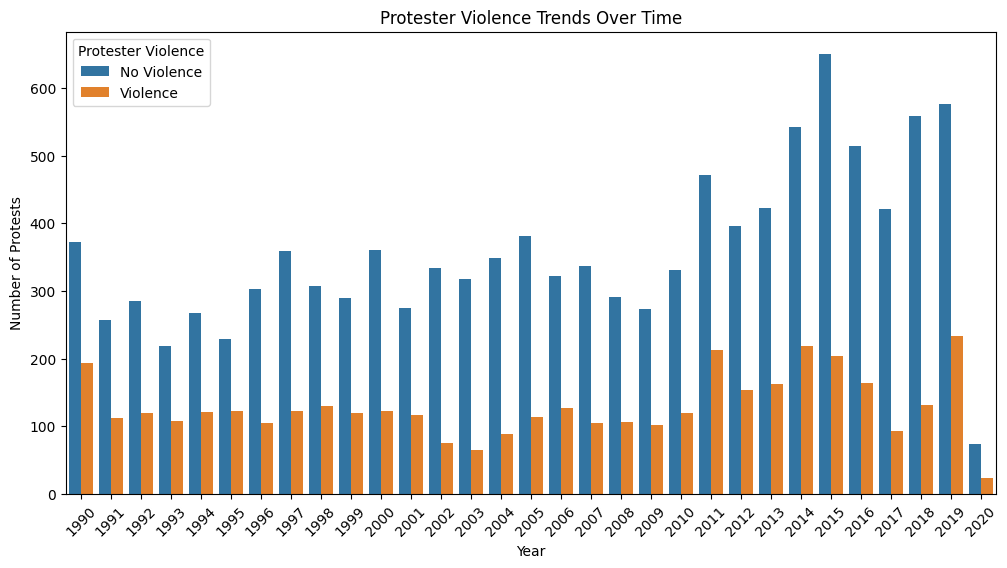

In [14]:
# Explore Protester Violence Trends Over Time
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='protesterviolence', data=data)
plt.title('Protester Violence Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.legend(title='Protester Violence', labels=['No Violence', 'Violence'])
plt.xticks(rotation=45)
plt.show()

The graph illustrates the frequency of protester violence over time across various regions. In 2015, the highest number of protests without violence was recorded, surpassing 600 incidents. Conversely, in 2019, the highest number of violent protests was observed, exceeding 200 incidents.

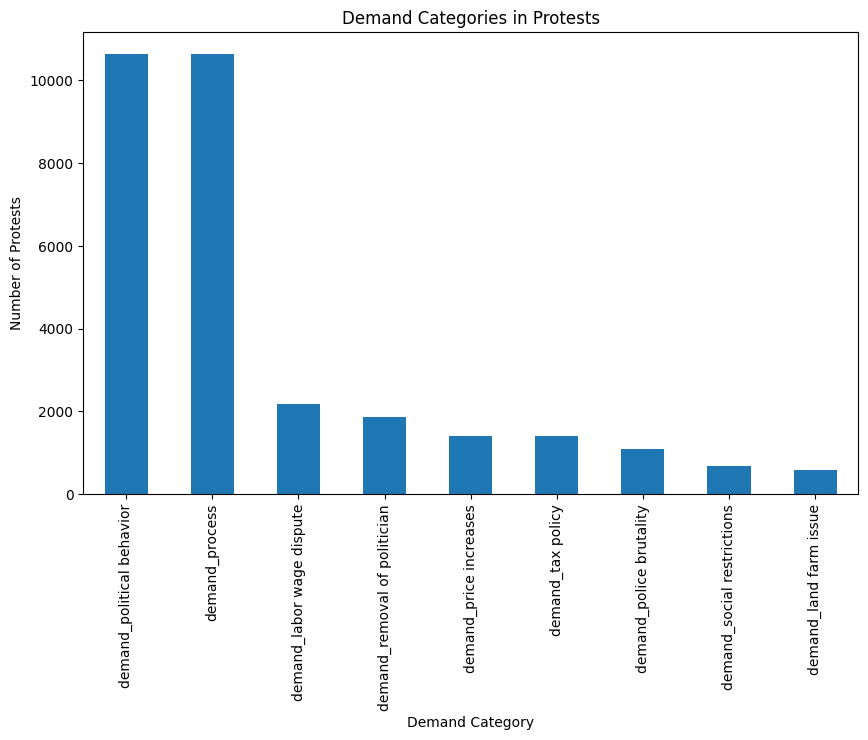

In [15]:
# Analyze Demand Categories
demand_columns = [col for col in data.columns if col.startswith('demand_')]
demand_counts = data[demand_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
demand_counts.plot(kind='bar')
plt.title('Demand Categories in Protests')
plt.xlabel('Demand Category')
plt.ylabel('Number of Protests')
plt.xticks(rotation=90)
plt.show()

The above graph shows the most common protest demands are in the following categories:

1. Economic Justice
2. Social Justice
3. Demand_political behavior
4. Demand_process

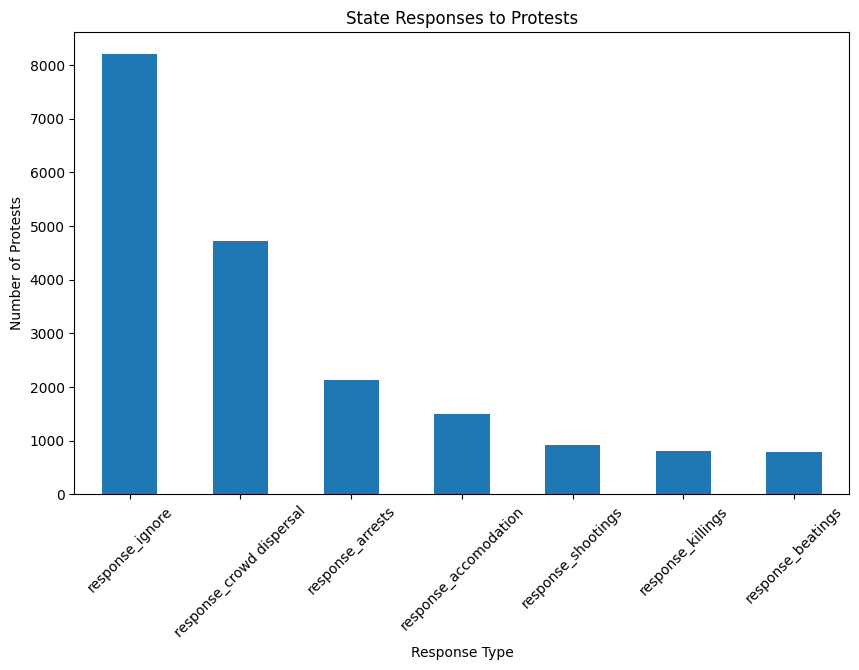

In [16]:
# Evaluate State Responses
response_columns = [col for col in data.columns if col.startswith('response_')]
response_counts = data[response_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
response_counts.plot(kind='bar')
plt.title('State Responses to Protests')
plt.xlabel('Response Type')
plt.ylabel('Number of Protests')
plt.xticks(rotation=45)
plt.show()

The graph shows how states responded to protests:
* Use of force: Arrest is the most common forceful response, followed by shootings, killings, beatings, and crowd dispersal.
* Non-confrontational responses: Ignoring protests is the most common non-confrontational response, followed by accommodation.

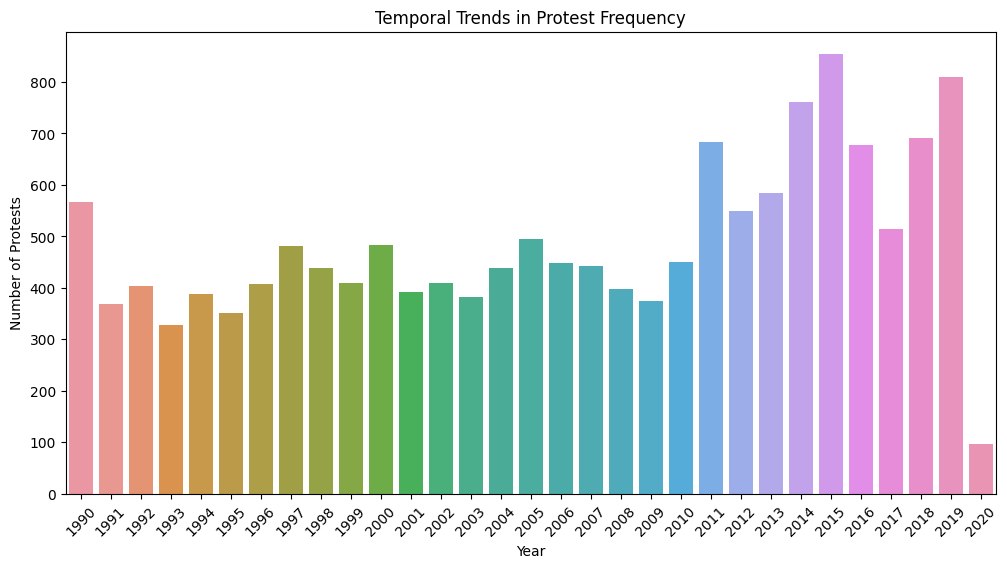

In [17]:
# Temporal Trends in Protest Frequency
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=data)
plt.title('Temporal Trends in Protest Frequency')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.xticks(rotation=45)
plt.show()

The visualization reveals fluctuations in protest frequency over the years, offering insights into patterns and trends in protest activity over time. The lowest frequency of protests occurred in 2020, likely influenced by the global COVID-19 pandemic. Conversely, the highest frequency of protests was observed in 2015.

## 3.2 BIVARIATE ANALYSIS

Bivariate analysis is a statisctical method used to examine the relationship between two variables.  The goal is to understand whether and how the two variables are related, and if so, to characterize the nature of that relationship.

In [26]:
# Filter data for Kenya
kenya_data = data[data['country'] == 'Kenya']

## Plotting function
def save_plot(plot_func, filename, title):
    plt.figure(figsize=(12, 6))
    plot_func()
    plt.title(title)
    plt.xlabel("Participants (Numeric)")
    plt.ylabel("Protest Duration")

    # Remove scientific notation from x-axis
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter())

 
    plt.savefig(filename)
    plt.show()

#### 3.2.1 Numerical vs Numerical

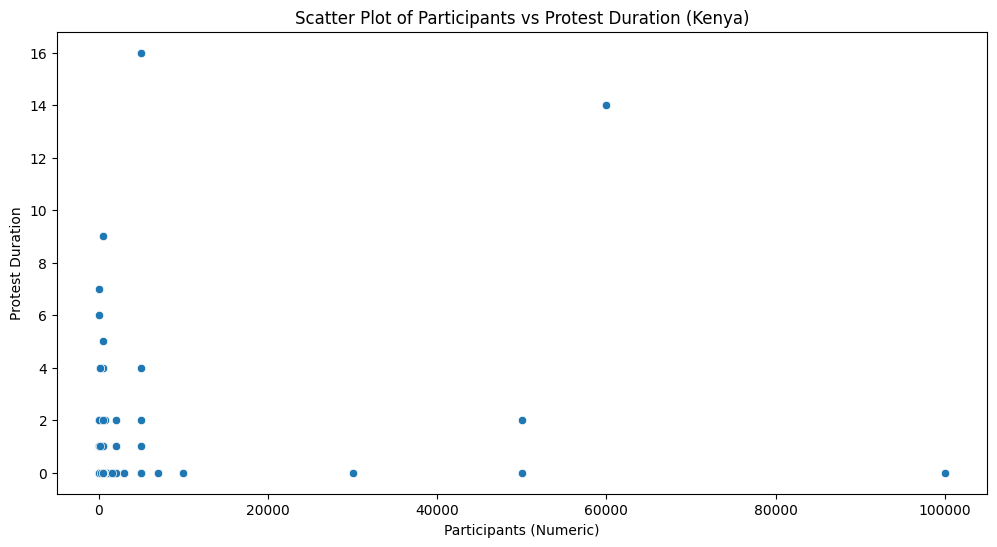

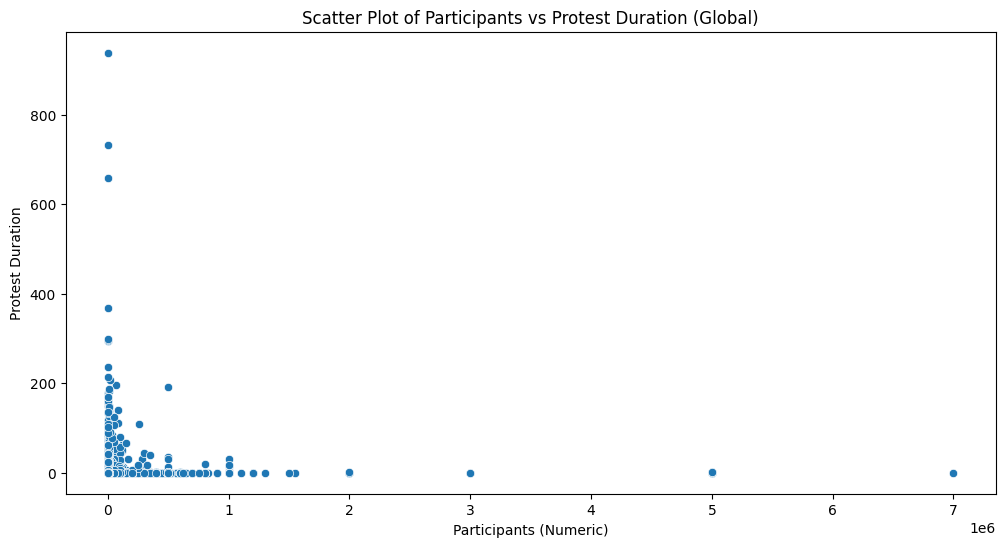

In [27]:
# Kenya
save_plot(
    lambda: sns.scatterplot(data=kenya_data, x='participants_numeric', y='protest_duration'),
    'scatter_plot_kenya.png',
    'Scatter Plot of Participants vs Protest Duration (Kenya)'
)

# Global
save_plot(
    lambda: sns.scatterplot(data=data, x='participants_numeric', y='protest_duration'),
    'scatter_plot_global.png',
    'Scatter Plot of Participants vs Protest Duration (Global)'
)

**(1e6, means 1,000,000)**

For both Kenya and the World, the longer the protest the less the number of participants.

**The Kenya plot is showing:**
  
The plot shows individual data points representing each protest. Each point is positioned according to the number of participants and the duration 
of the respective protest.

Observations:

Spread: The data points are widely spread across the plot, indicating a large range in both the number of participants and protest duration.

Clusters: There appears to be a cluster of protests with a relatively small number of participants and shorter durations, suggesting a concentration of smaller-scale protests.

Outliers: A few data points with significantly higher participant numbers and longer durations can be considered outliers. These might represent particularly large or prolonged protests.

Relationship: It's difficult to discern a clear linear relationship between the number of participants and protest duration. The data points seem scattered without a strong trend.

The plot suggests that protest size (number of participants) doesn't necessarily correlate strongly with protest duration in Kenya.

There is a wide range of protest sizes and durations,indicating diverse protest activities in the country.

Further analysis with additional data points or statistical measures could reveal potential correlations or patterns.


**The global plot is showing:**

Distribution: The majority of data points cluster in the lower left corner, indicating that most protests involve a relatively small number of participants and have shorter durations.

Outliers: There are a few outliers with a high number of participants and longer durations, suggesting that some protests are significantly larger and more prolonged.

No Clear Correlation: There doesn't seem to be a strong linear relationship between the number of participants and protest duration. The data points are scattered without a clear pattern.


Diverse Protest Landscape: The wide distribution of data points suggests that protests vary greatly in size and length, reflecting the diverse nature of social and political movements worldwide.

Factors Beyond Participant Numbers: Factors other than the number of participants likely influence protest duration, such as the nature of the issue, government response, and social conditions.

Limitations of the Data: The plot doesn't provide information about the specific time period, types of protests, or geographic distribution of the data, which could affect the interpretation.


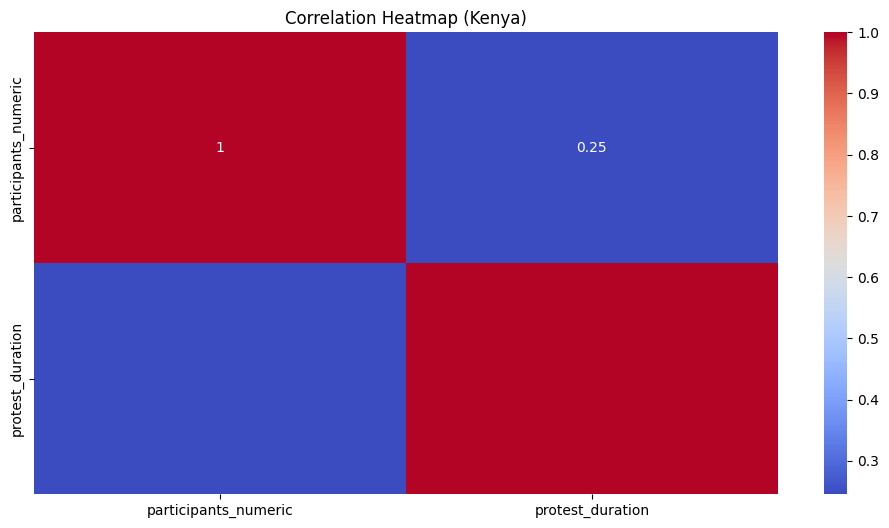

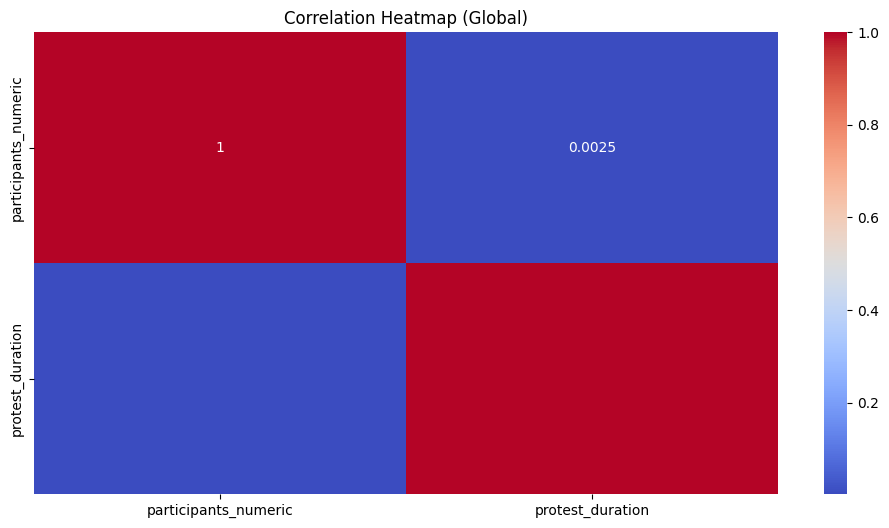

In [21]:
# Kenya
corr_kenya = kenya_data[['participants_numeric', 'protest_duration']].corr()
save_plot(
    lambda: sns.heatmap(corr_kenya, annot=True, cmap='coolwarm'),
    'correlation_heatmap_kenya.png',
    'Correlation Heatmap (Kenya)'
)

# Global
corr_global = data[['participants_numeric', 'protest_duration']].corr()
save_plot(
    lambda: sns.heatmap(corr_global, annot=True, cmap='coolwarm'),
    'correlation_heatmap_global.png',
    'Correlation Heatmap (Global)'
)


* In Kenya protest duration has a slightly +ve impact on participant turnout.
* Globally this has the same effect but on a much smaller scale, as the correlation is 0.0025.

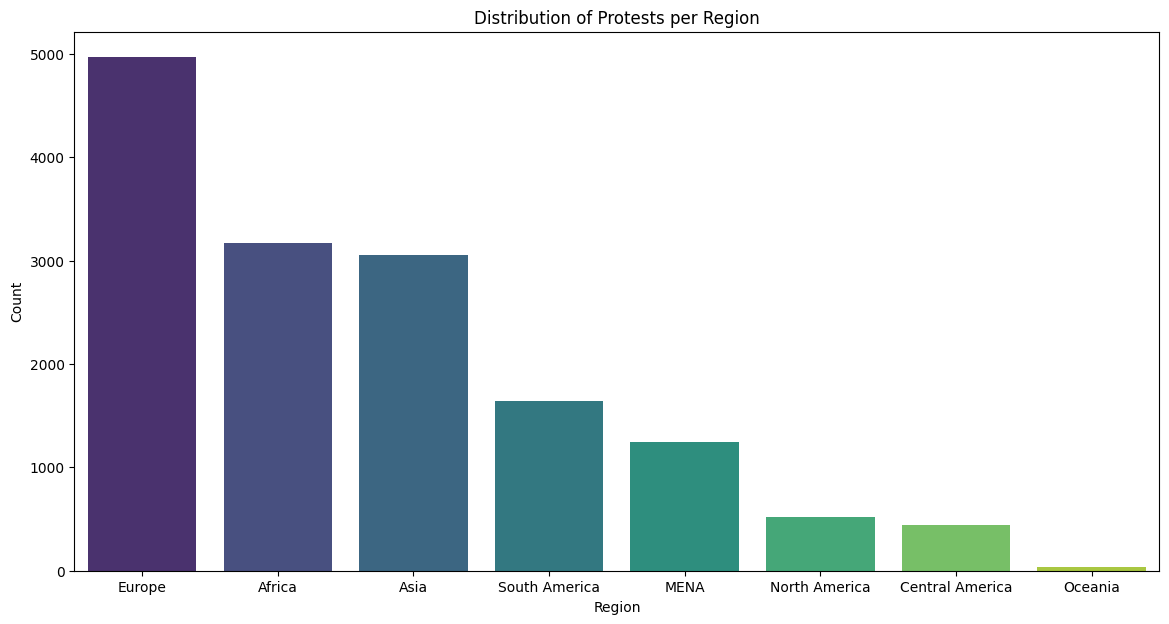

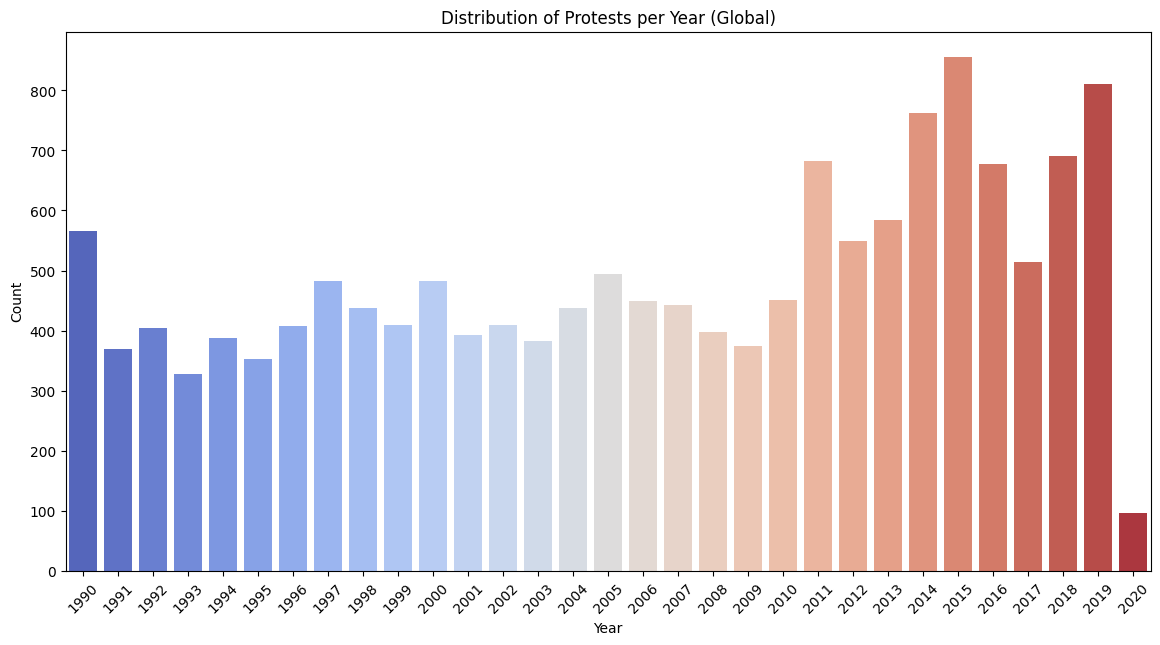

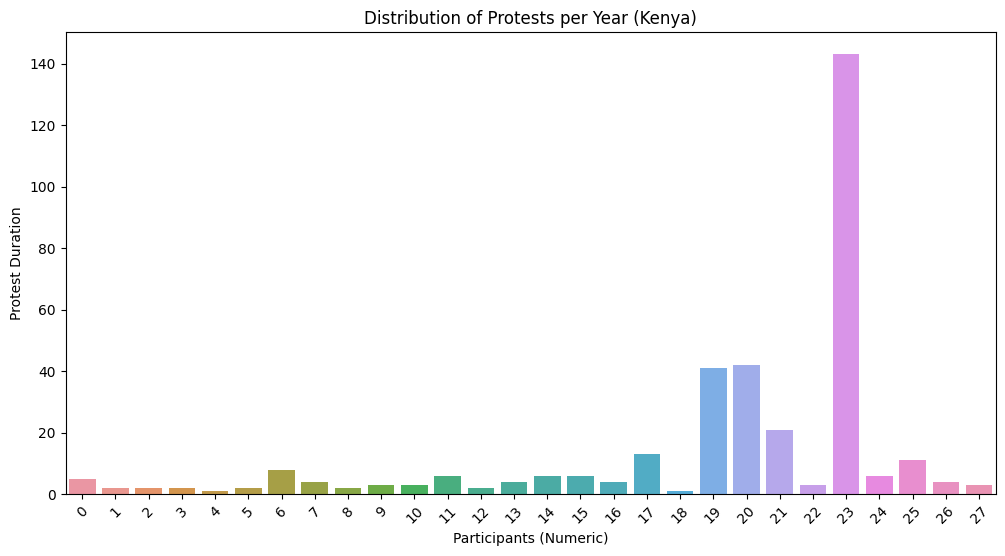

In [28]:
# Distribution of protests by region
plt.figure(figsize=(14, 7))
sns.countplot(x=data['region'], palette="viridis", order=data['region'].value_counts().index)
plt.title('Distribution of Protests per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Global
plt.figure(figsize=(14, 7))
sns.countplot(x=data['year'], palette="coolwarm")
plt.title('Distribution of Protests per Year (Global)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();

# Kenya
save_plot(
    lambda: sns.countplot(data=kenya_data, x='year').set_xticklabels(kenya_data['year'].unique(), rotation=45),
    'dist_protests_year_kenya.png',
    'Distribution of Protests per Year (Kenya)'
)


* Europe had the most recorded protests with Oceania recording the least.
* The distribution of protests took an upward turn in the 2010's.
* Kenya had a record high protests in 2015. This was also observed in other nations.

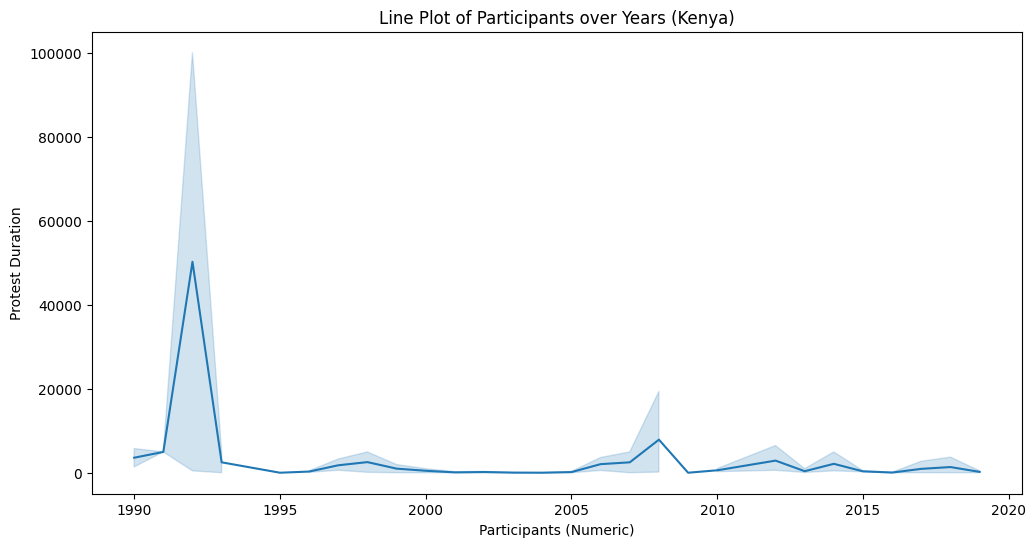

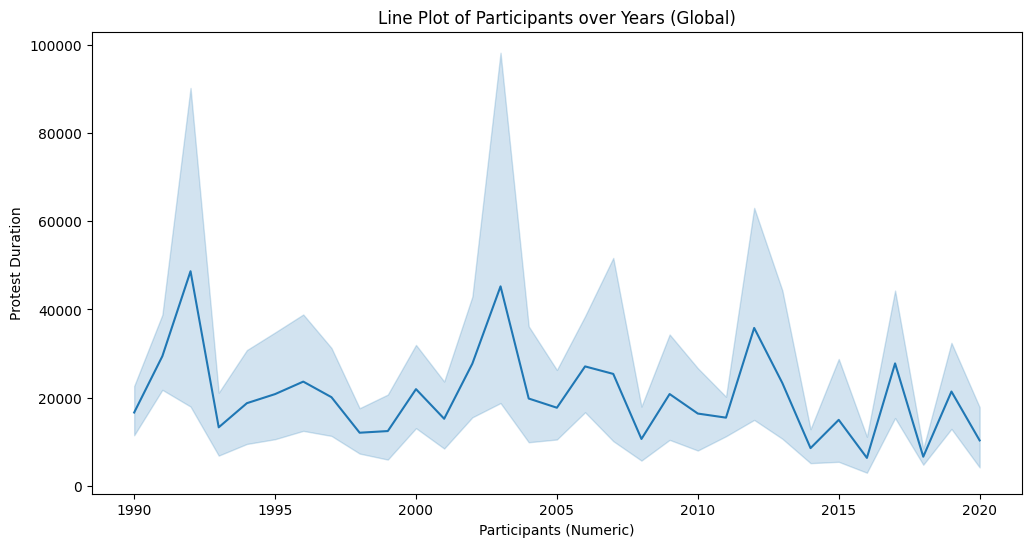

In [29]:
# Kenya
save_plot(
    lambda: sns.lineplot(data=kenya_data, x='year', y='participants_numeric'),
    'line_plot_kenya.png',
    'Line Plot of Participants over Years (Kenya)'
)

# Global
save_plot(
    lambda: sns.lineplot(data=data, x='year', y='participants_numeric'),
    'line_plot_global.png',
    'Line Plot of Participants over Years (Global)'
)


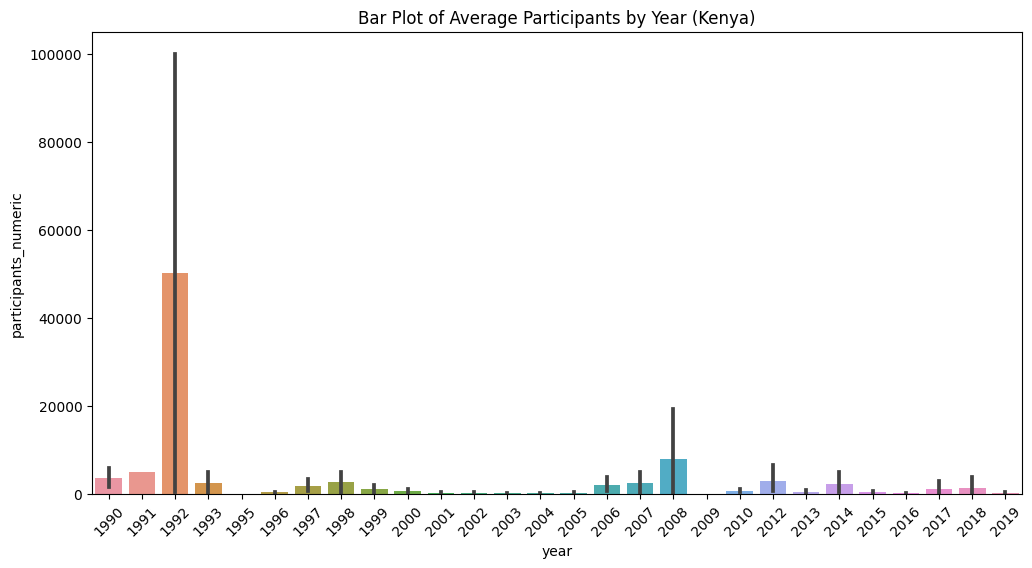

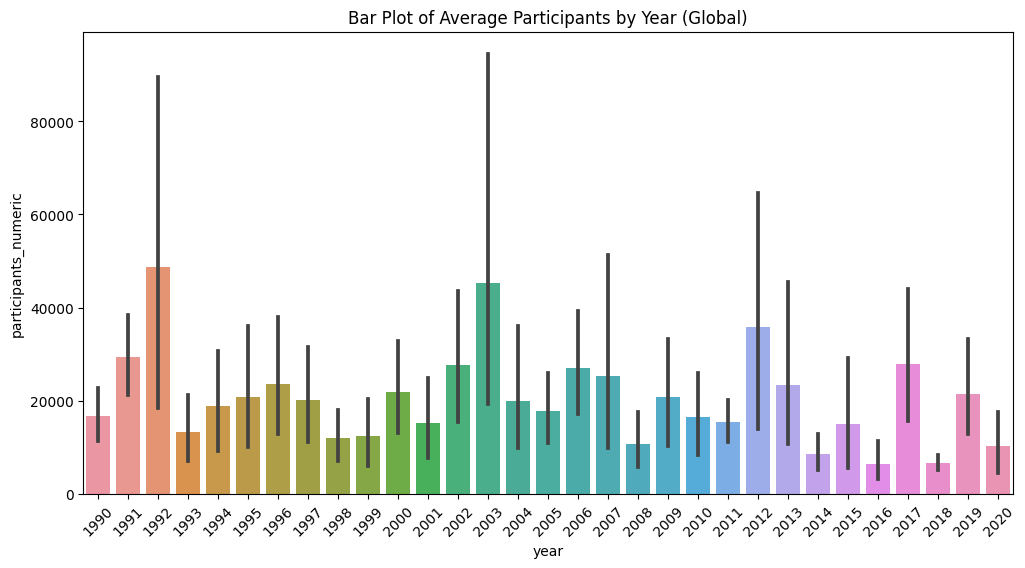

In [24]:
# Kenya
save_plot(
    lambda: sns.barplot(data=kenya_data, x='year', y='participants_numeric', estimator=np.mean).set_xticklabels(kenya_data['year'].unique(), rotation=45),
    'bar_plot_kenya.png',
    'Bar Plot of Average Participants by Year (Kenya)'
)

# Global
data_sorted_by_year = data.sort_values('year')

save_plot(
    lambda: sns.barplot(data=data_sorted_by_year, x='year', y='participants_numeric', estimator=np.mean).set_xticklabels(sorted(data_sorted_by_year['year'].unique()), rotation=45),
    'bar_plot_global.png',
    'Bar Plot of Average Participants by Year (Global)'
)


* Protester turnout in Kenya is usually relatively low and predictable compared to 1992, which was during when  Kenyans took to the streets to demand free elections. This can be infered from the barplot and line plot.

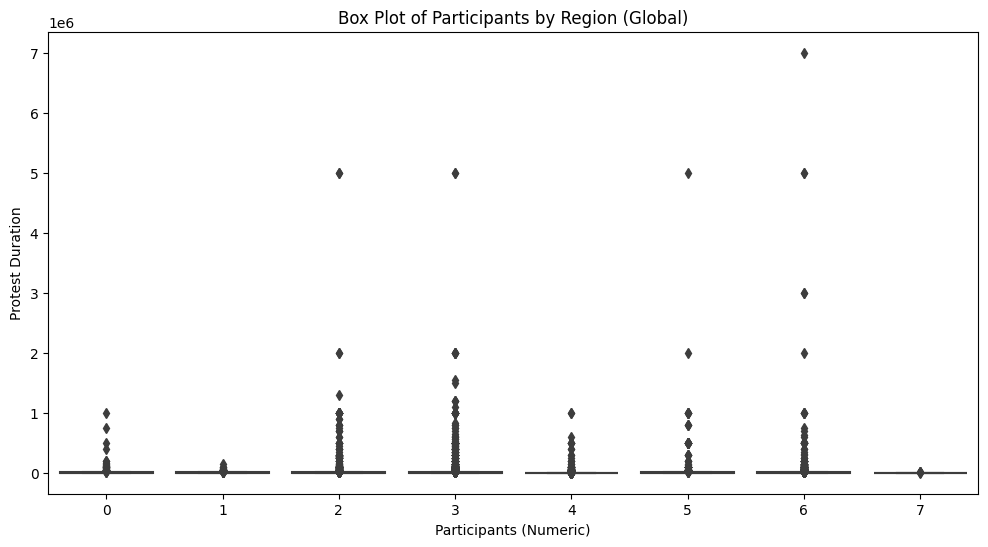

In [30]:
# Global
save_plot(
    lambda: sns.boxplot(data=data, x='region', y='participants_numeric'),
    'box_plot_global.png',
    'Box Plot of Participants by Region (Global)'
)


**(1e6, means 1,000,000).**

* Regions with higher populations(particularly Asia) recorded a higher number of outliers in the number of protest participants.

### 3.2.2. Categorical vs Categorical

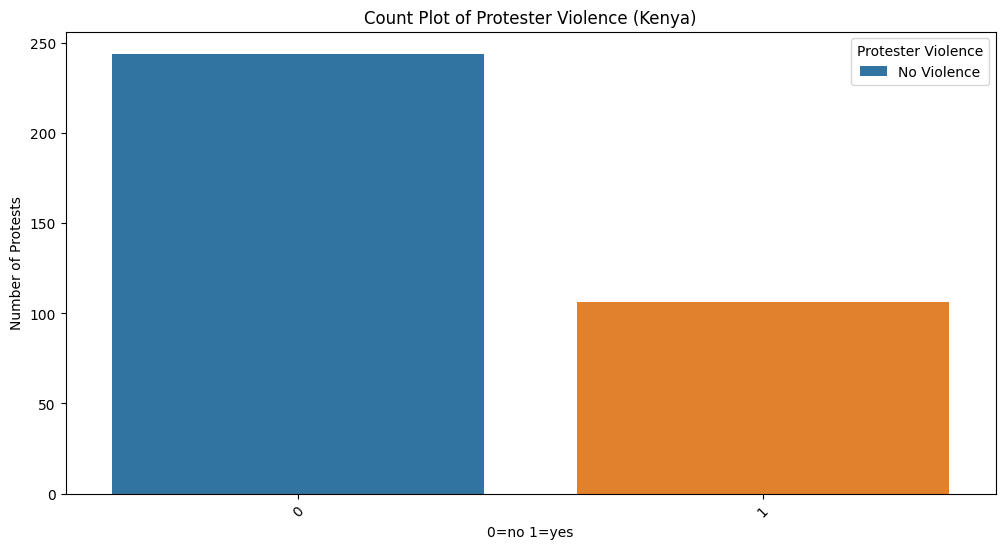

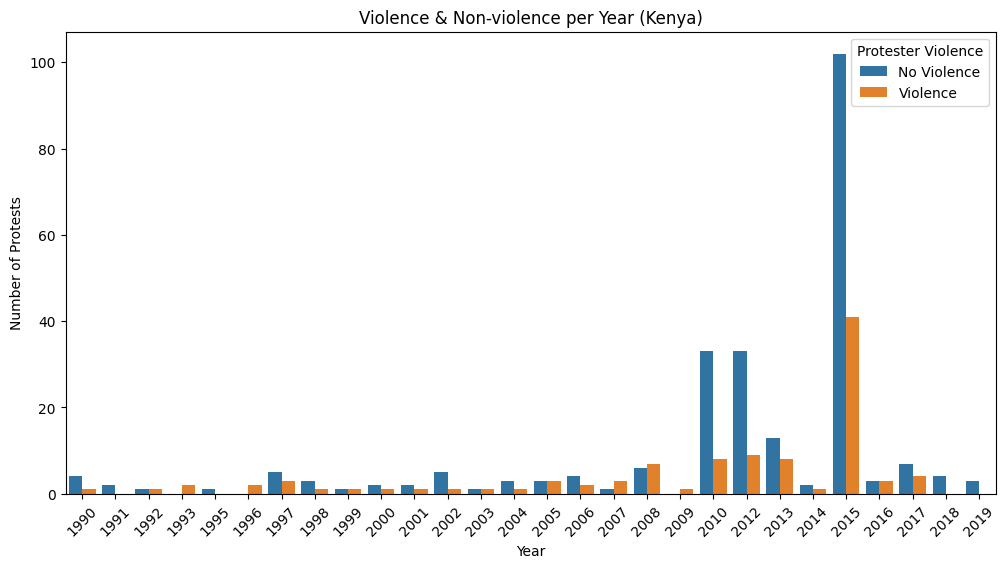

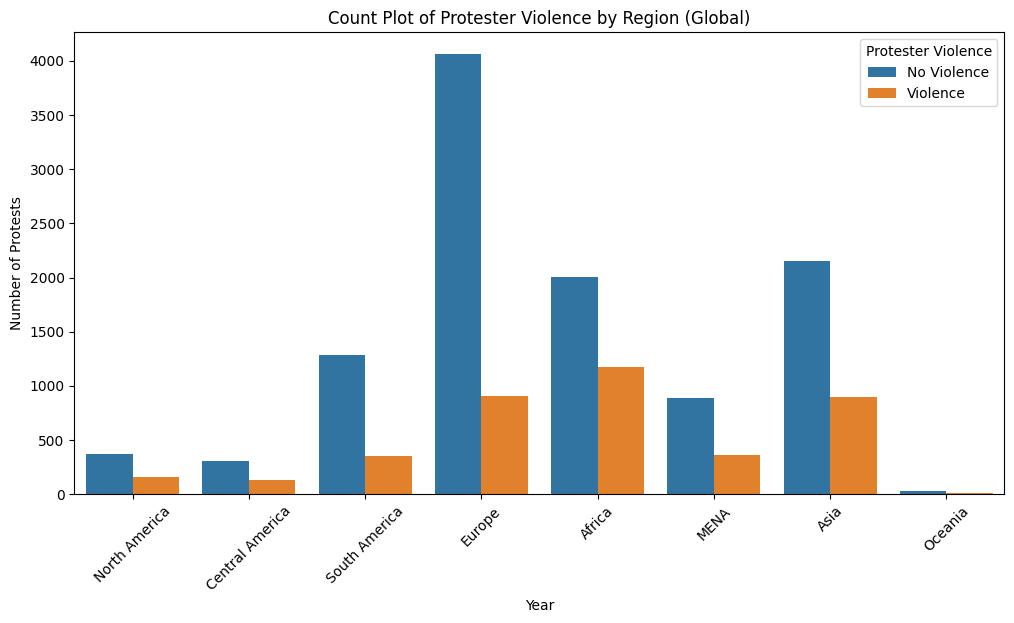

In [31]:
# Explore Protester Violence In Kenya
plt.figure(figsize=(12, 6))
sns.countplot(x='protesterviolence', data=kenya_data, palette=["#1f77b4", "#ff7f0e"])
plt.title('Count Plot of Protester Violence (Kenya)')
plt.xlabel('0=no 1=yes')
plt.ylabel('Number of Protests')
plt.legend(title='Protester Violence', labels=['No Violence', 'Violence'])
plt.xticks(rotation=45)
plt.show()

# Explore Protester Violence Trends In Kenya Over Time
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='protesterviolence', data=kenya_data, palette=["#1f77b4", "#ff7f0e"])
plt.title('Violence & Non-violence per Year (Kenya)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.legend(title='Protester Violence', labels=['No Violence', 'Violence'])
plt.xticks(rotation=45)
plt.show()

# Explore Protester Violence Across Regions
plt.figure(figsize=(12, 6))
sns.countplot(x='region', hue='protesterviolence', data=data)
plt.title('Count Plot of Protester Violence by Region (Global)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.legend(title='Protester Violence', labels=['No Violence', 'Violence'])
plt.xticks(rotation=45)
plt.show()

* In Kenya violent protests account for about 1/3 of the total protests.
* In the years 2007-2009 violent protests were the majority in Kenya. This was most likely due to the election outcome.
* Globally most protests are non-violent.

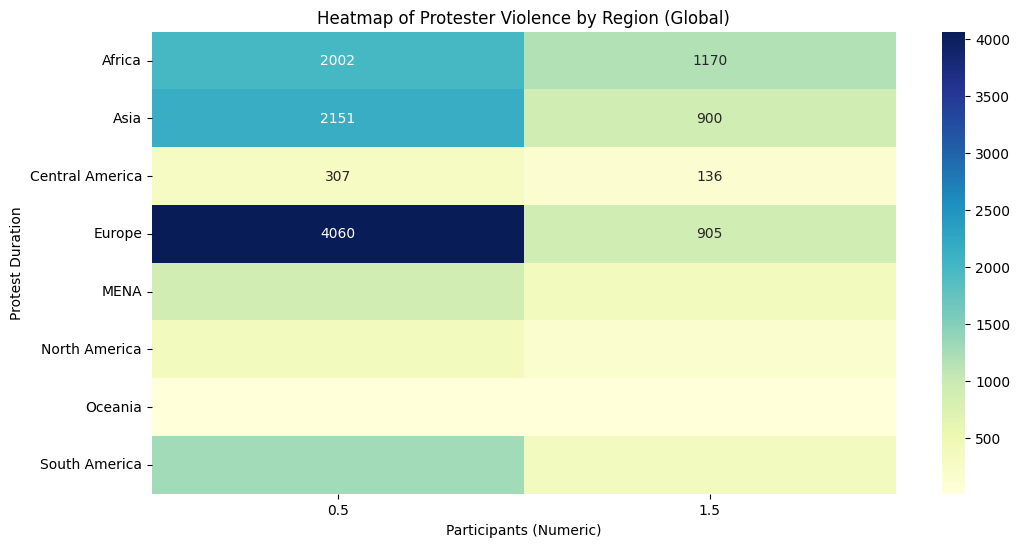

In [32]:
# Global - Heatmap of Protester Violence by Region
global_pivot = data.pivot_table(index='region', columns='protesterviolence', aggfunc='size', fill_value=0)
save_plot(
    lambda: sns.heatmap(global_pivot, annot=True, cmap='YlGnBu', fmt='d'),
    'heatmap_categorical_global.png',
    'Heatmap of Protester Violence by Region (Global)'
)

* In Africa violent protests account for over 1/3 of total protests contrasted to Europe's 1/5.

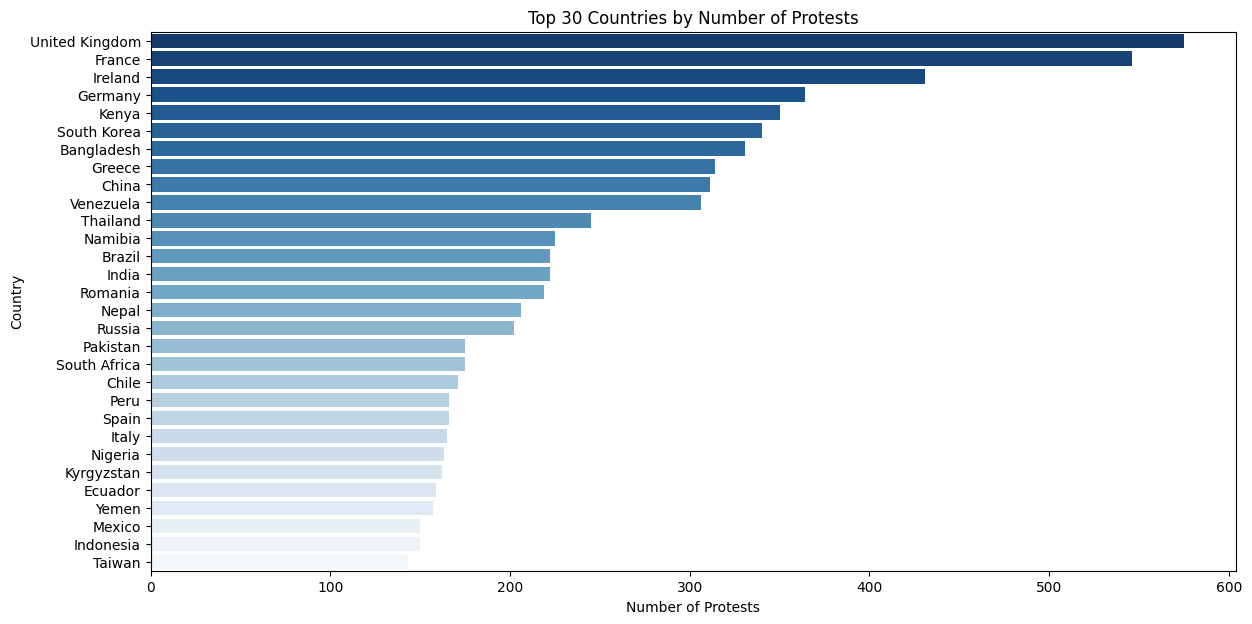

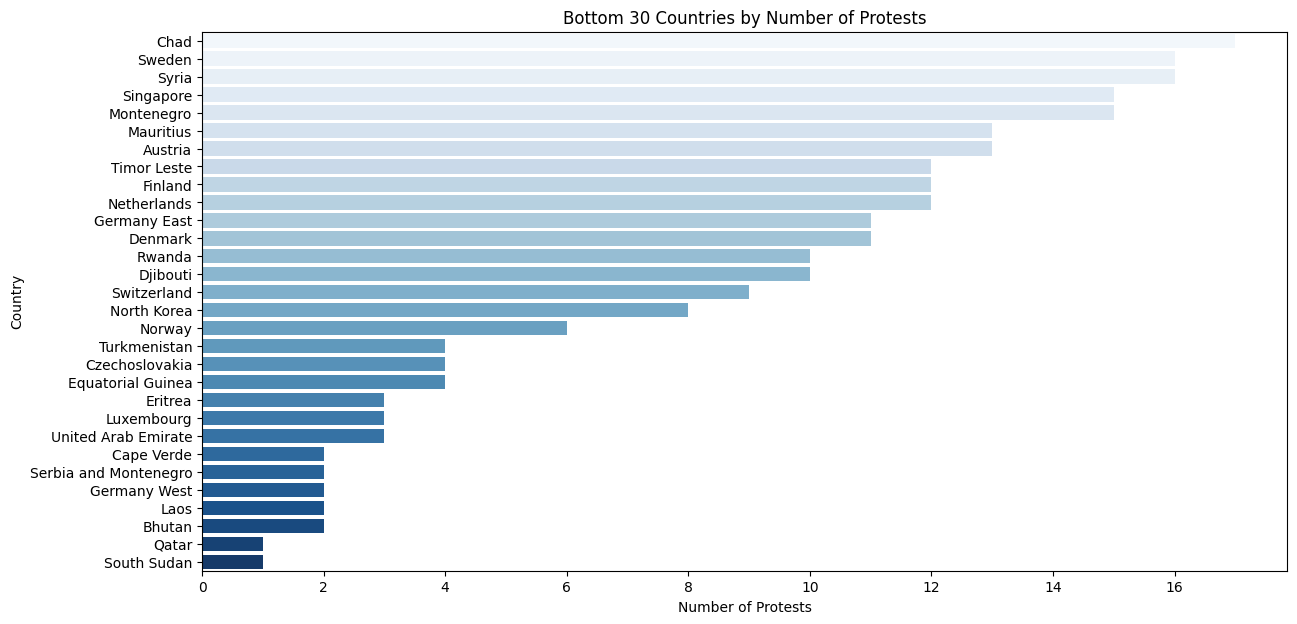

In [33]:
# Top 30
top_30_countries = data['country'].value_counts().head(30)
plt.figure(figsize=(14, 7))
sns.barplot(y=top_30_countries.index, x=top_30_countries.values, palette="Blues_r")
plt.title('Top 30 Countries by Number of Protests')
plt.xlabel('Number of Protests')
plt.ylabel('Country')
plt.show()

# Bottom 30
bottom_30_countries = data['country'].value_counts().tail(30)
plt.figure(figsize=(14, 7))
sns.barplot(y=bottom_30_countries.index, x=bottom_30_countries.values, palette="Blues")
plt.title('Bottom 30 Countries by Number of Protests')
plt.xlabel('Number of Protests')
plt.ylabel('Country')
plt.show()

The above graph shows the top & bottom 30 countries by number of protests in the dataset.
* United Kingdom and France had over 500 protests.
* While some like Qatar have just one.

#### 3.2.3 Responses

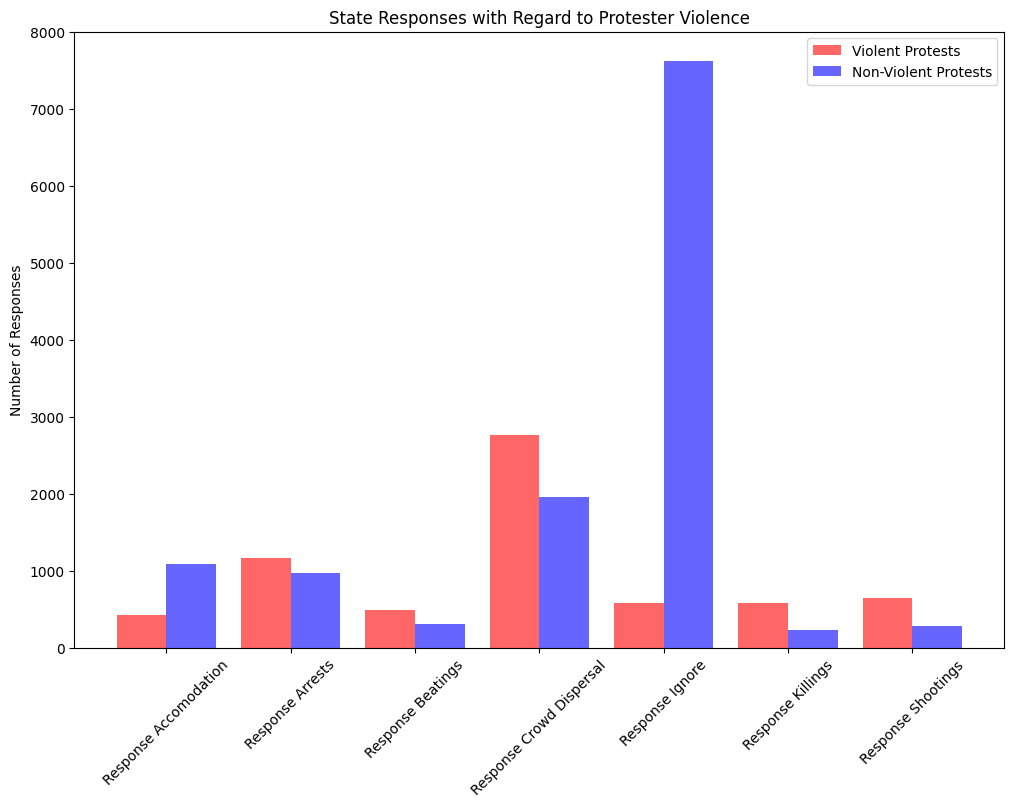

In [34]:
# State responses vs. protester violence
responses = ['response_accomodation', 'response_arrests', 'response_beatings',
             'response_crowd dispersal', 'response_ignore', 'response_killings', 'response_shootings']

# Summing up the responses for violent and non-violent protests
response_violence = data[data['protesterviolence'] == 1][responses].sum()
response_nonviolence = data[data['protesterviolence'] == 0][responses].sum()

# Plotting side-by-side bars
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.4  # width of the bars
ind = np.arange(len(responses))  # the x locations for the groups

ax.bar(ind - width/2, response_violence, width, label='Violent Protests', color='red', alpha=0.6)
ax.bar(ind + width/2, response_nonviolence, width, label='Non-Violent Protests', color='blue', alpha=0.6)
ax.set_title('State Responses with Regard to Protester Violence')
ax.set_ylabel('Number of Responses')
ax.set_xticks(ind)
ax.set_xticklabels([response.replace('_', ' ').title() for response in responses], rotation=45)
ax.legend()

plt.show()


The bar graph presents a comparison of how states respond to violent and non-violent protests across various response categories.

**Key Findings:**

Disproportionate Response to Violent Protests: The most striking observation is the significantly higher number of responses related to violent protests compared to non-violent ones. This indicates a more robust and often harsher state reaction to violent demonstrations.

Dominance of Crowd Dispersal: Across both protest types, "Crowd Dispersal" is the most frequent response, suggesting it's a common tactic employed by authorities to manage protests.

Arrests and Beatings: These responses are prevalent in both categories, though they seem to be more pronounced in cases of violent protests.
Extreme Measures: While less frequent, responses like "Killings" and "Shootings" appear to be exclusively associated with violent protests, highlighting the severe consequences that can arise from such demonstrations.

Accommodation and Ignore: These responses are minimal in both categories, indicating that they are less common strategies for handling protests.

Overall, the graph reveals a pattern of more aggressive state responses to violent protests, with crowd dispersal being the primary tactic, followed by arrests and beatings.

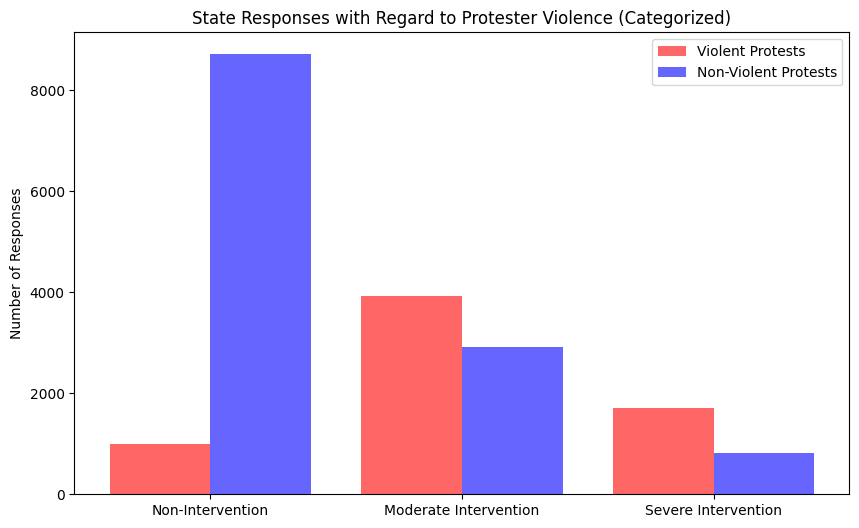

In [35]:
# Categorized state responses
non_intervention = ['response_accomodation', 'response_ignore']
moderate_intervention = ['response_arrests', 'response_crowd dispersal']
severe_intervention = ['response_beatings', 'response_killings', 'response_shootings']

# Summing up the responses for each category
response_violence = {
    'Non-Intervention': data[data['protesterviolence'] == 1][non_intervention].sum().sum(),
    'Moderate Intervention': data[data['protesterviolence'] == 1][moderate_intervention].sum().sum(),
    'Severe Intervention': data[data['protesterviolence'] == 1][severe_intervention].sum().sum()
}
response_nonviolence = {
    'Non-Intervention': data[data['protesterviolence'] == 0][non_intervention].sum().sum(),
    'Moderate Intervention': data[data['protesterviolence'] == 0][moderate_intervention].sum().sum(),
    'Severe Intervention': data[data['protesterviolence'] == 0][severe_intervention].sum().sum()
}

# Plotting side-by-side bars
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.4  # width of the bars
ind = np.arange(len(response_violence))  # the x locations for the groups

ax.bar(ind - width/2, list(response_violence.values()), width, label='Violent Protests', color='red', alpha=0.6)
ax.bar(ind + width/2, list(response_nonviolence.values()), width, label='Non-Violent Protests', color='blue', alpha=0.6)
ax.set_title('State Responses with Regard to Protester Violence (Categorized)')
ax.set_ylabel('Number of Responses')
ax.set_xticks(ind)
ax.set_xticklabels(list(response_violence.keys()))
ax.legend()

plt.show()

The bar graph illustrates the frequency of different state responses to both violent and non-violent protests.

**Key Findings:**

Disproportionate Response to Violent Protests: The most striking observation is that state responses are significantly higher for violent protests across all categories. This indicates a more forceful and frequent state reaction to violent demonstrations.

Dominance of Moderate Intervention: While "Moderate Intervention" is the most frequent response for both protest types, it is notably higher for violent protests.

Non-Intervention and Severe Intervention: The use of "Non-Intervention" is minimal in both cases, suggesting it's a rare strategy. Conversely, "Severe Intervention" is primarily used in response to violent protests.

Overall, the graph demonstrates a clear pattern of escalated state responses to violent protests compared to non-violent ones.

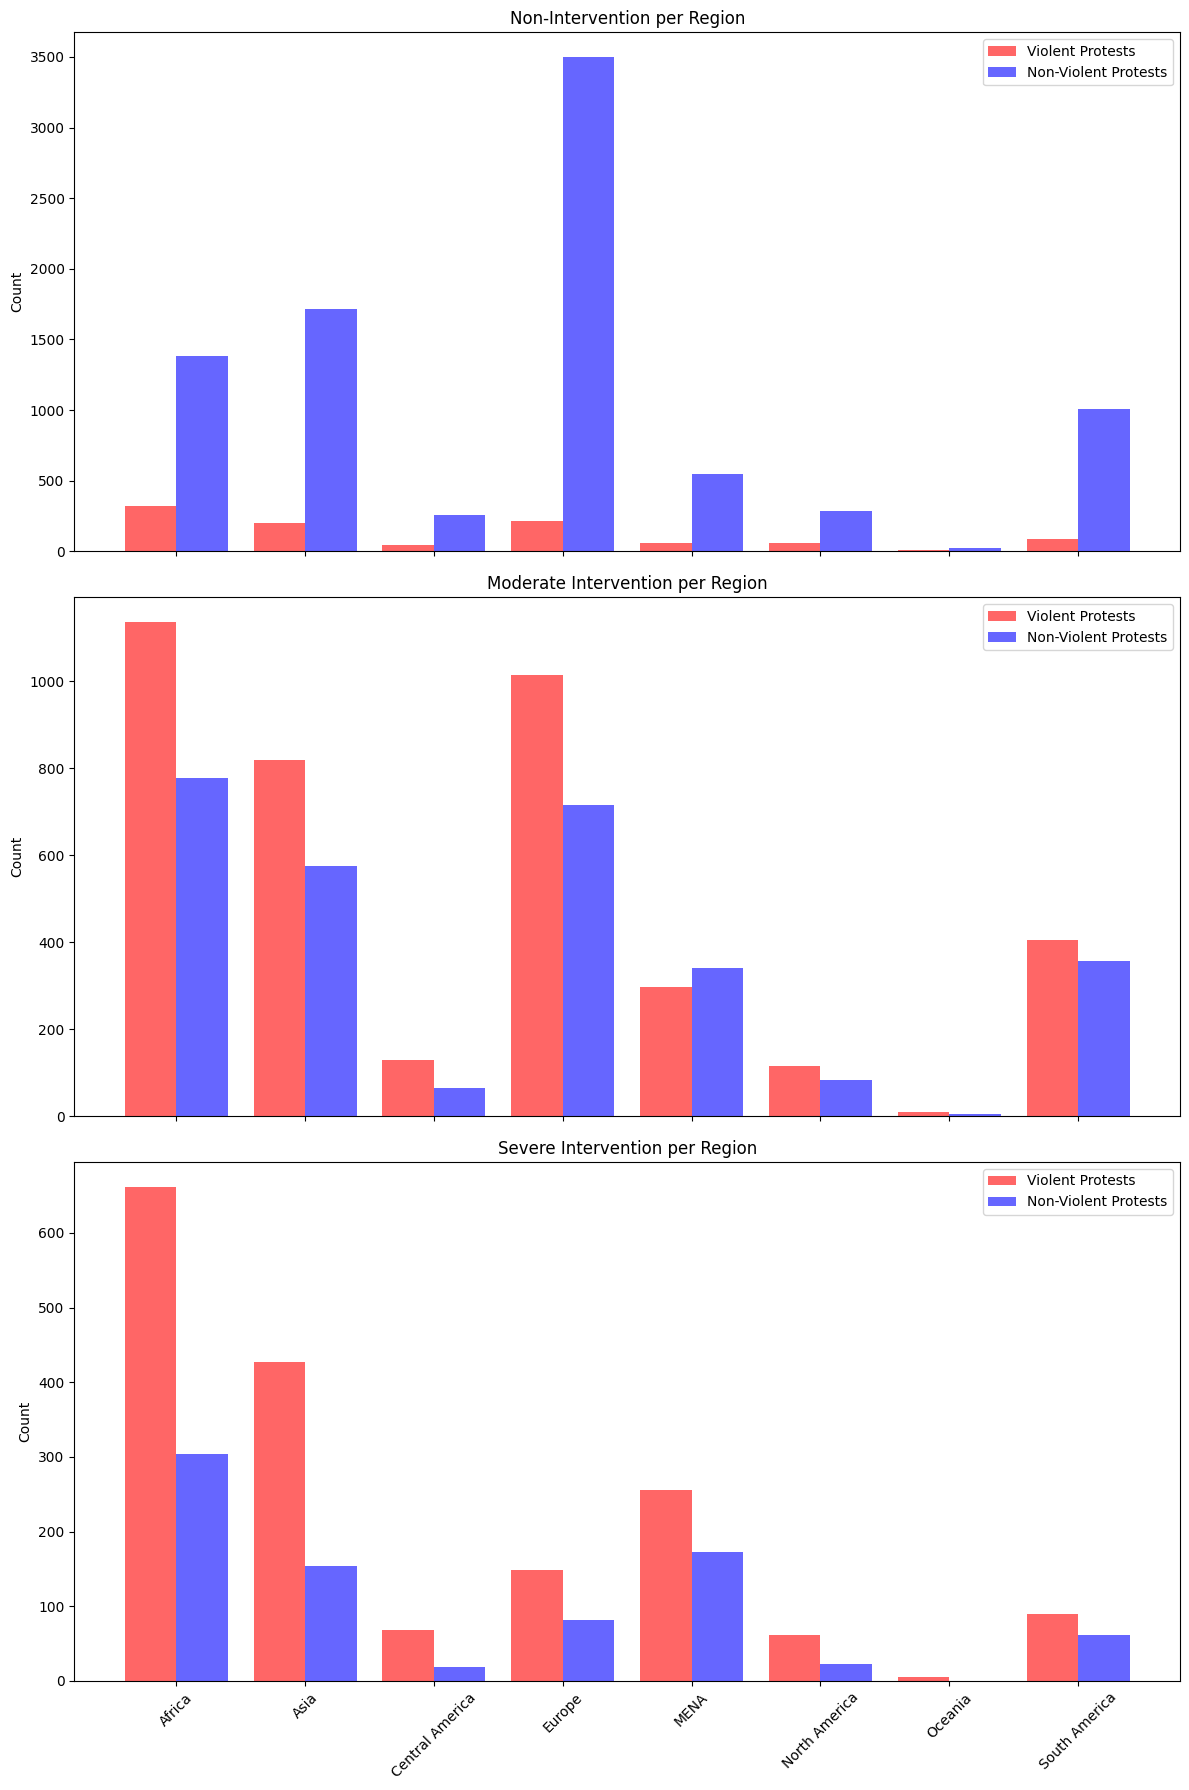

In [36]:
# Violence & non-violence outcomes per region
violence_outcomes_region = {
    'Non-Intervention': data[data['protesterviolence'] == 1].groupby('region')[non_intervention].sum().sum(axis=1),
    'Moderate Intervention': data[data['protesterviolence'] == 1].groupby('region')[moderate_intervention].sum().sum(axis=1),
    'Severe Intervention': data[data['protesterviolence'] == 1].groupby('region')[severe_intervention].sum().sum(axis=1)
}
nonviolence_outcomes_region = {
    'Non-Intervention': data[data['protesterviolence'] == 0].groupby('region')[non_intervention].sum().sum(axis=1),
    'Moderate Intervention': data[data['protesterviolence'] == 0].groupby('region')[moderate_intervention].sum().sum(axis=1),
    'Severe Intervention': data[data['protesterviolence'] == 0].groupby('region')[severe_intervention].sum().sum(axis=1)
}

# Plotting side-by-side bars for each outcome
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
width = 0.4  # width of the bars
categories = ['Non-Intervention', 'Moderate Intervention', 'Severe Intervention']

for i, category in enumerate(categories):
    ax = axes[i]
    ind = np.arange(len(violence_outcomes_region[category]))  # the x locations for the groups

    ax.bar(ind - width/2, violence_outcomes_region[category], width, label='Violent Protests', color='red', alpha=0.6)
    ax.bar(ind + width/2, nonviolence_outcomes_region[category], width, label='Non-Violent Protests', color='blue', alpha=0.6)
    ax.set_title(f'{category} per Region')
    ax.set_ylabel('Count')
    ax.set_xticks(ind)
    ax.set_xticklabels(violence_outcomes_region[category].index, rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()


The graph presents a comparison of state responses to violent and non-violent protests across different regions of the world. It categorizes responses into three levels: non-intervention, moderate intervention, and severe intervention.

**Key Findings**

Disproportionate Response to Violent Protests: Across all regions and response levels, there is a significantly higher frequency of state interventions for violent protests compared to non-violent ones. This indicates a more forceful and often harsher state reaction to violent demonstrations.

Regional Variations: While the general pattern of more aggressive responses to violent protests holds true across regions, there are noticeable differences in the magnitude of these responses. For instance, some regions exhibit a higher frequency of severe interventions for both protest types compared to others.

Dominance of Moderate Intervention: Moderate intervention is the most common response category across all regions and protest types, suggesting it's a widely used strategy for managing protests.

Non-Intervention and Severe Intervention: Non-intervention is relatively rare across all regions and protest types. In contrast, severe intervention is primarily associated with violent protests, particularly in certain regions.

Potential Implications
The graph suggests that the global response to protests is characterized by a strong bias towards more forceful measures when faced with violence. This could have significant implications for civil liberties, human rights, and the overall political climate in different regions.

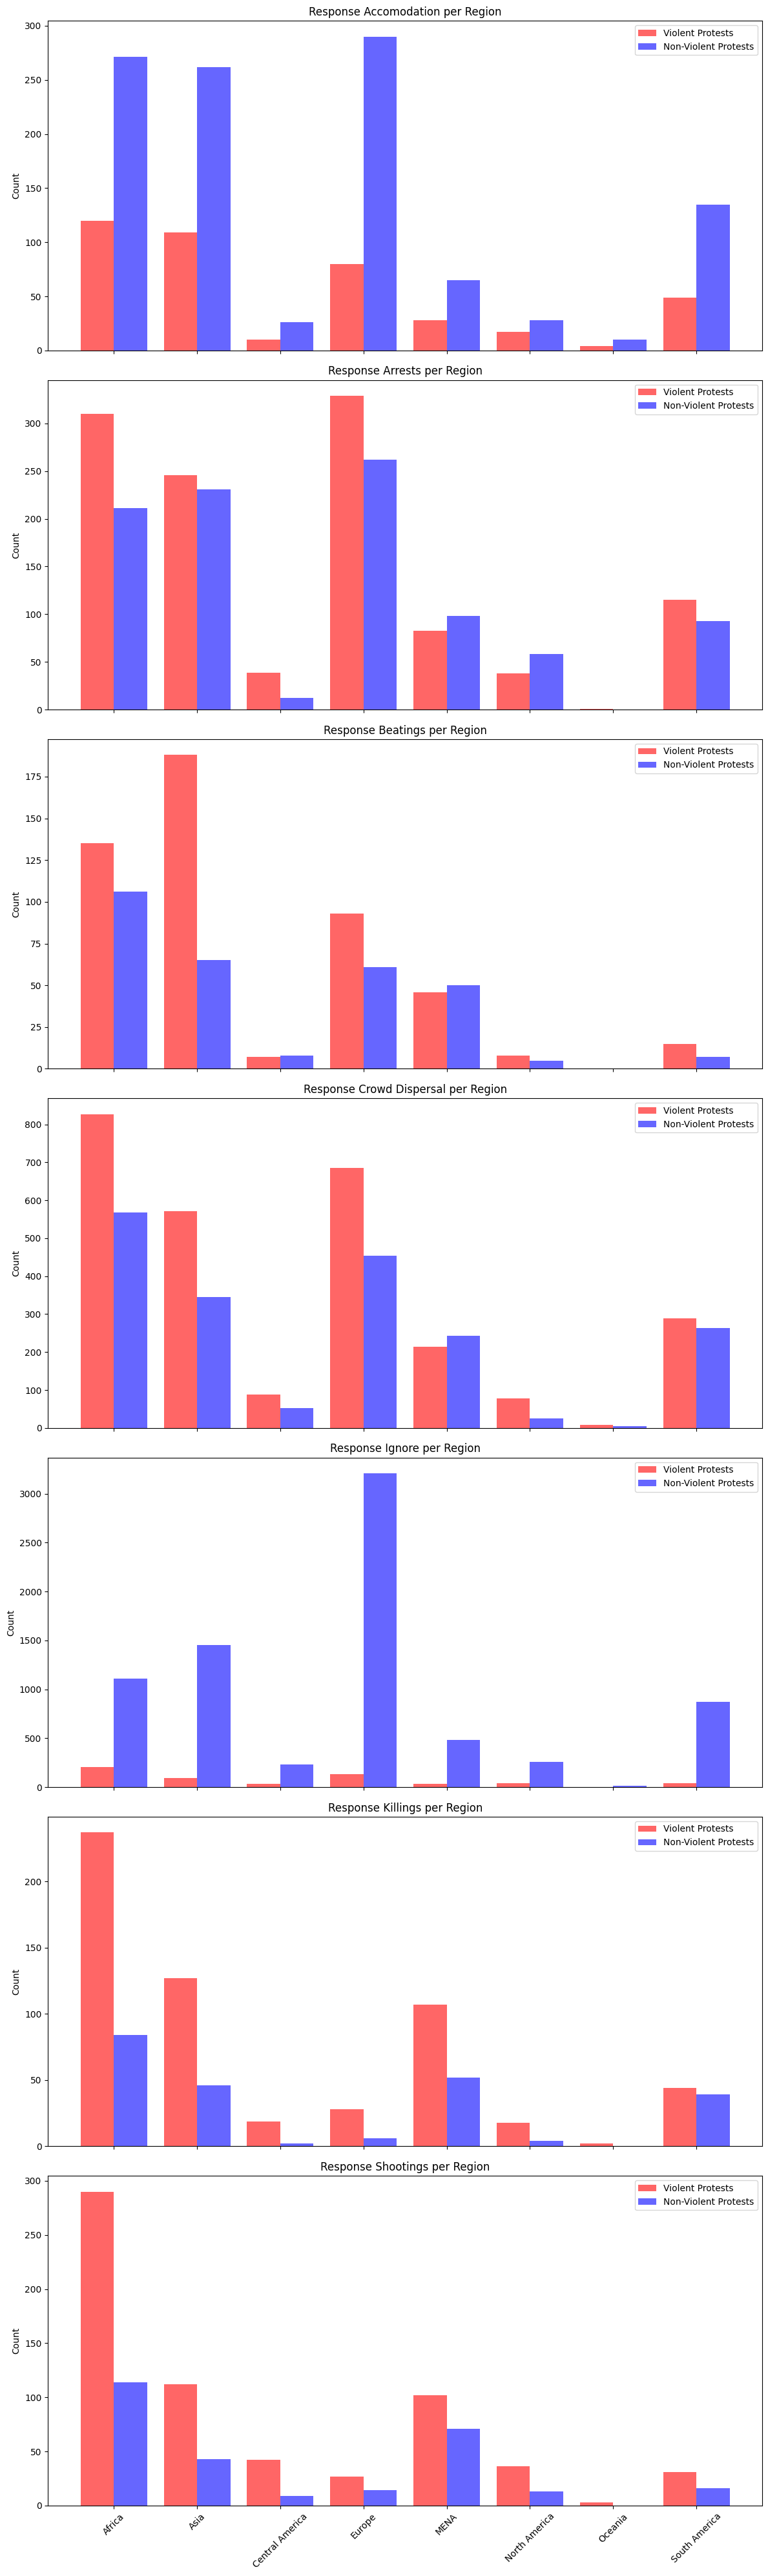

In [38]:
# Violence & non-violence outcomes per region
outcomes = responses.copy()
violence_outcomes_region = data[data['protesterviolence'] == 1].groupby('region')[outcomes].sum()
nonviolence_outcomes_region = data[data['protesterviolence'] == 0].groupby('region')[outcomes].sum()

# Plotting side-by-side bars for each outcome
fig, axes = plt.subplots(len(outcomes), 1, figsize=(12, 40), sharex=True)
width = 0.4  # width of the bars

for i, outcome in enumerate(outcomes):
    ax = axes[i]
    ind = np.arange(len(violence_outcomes_region))  # the x locations for the groups

    ax.bar(ind - width/2, violence_outcomes_region[outcome], width, label='Violent Protests', color='red', alpha=0.6)
    ax.bar(ind + width/2, nonviolence_outcomes_region[outcome], width, label='Non-Violent Protests', color='blue', alpha=0.6)
    ax.set_title(f'{outcome.replace("_", " ").title()} per Region')
    ax.set_ylabel('Count')
    ax.set_xticks(ind)
    ax.set_xticklabels(violence_outcomes_region.index, rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()


* For non-violent protests ignored is the favored response while crowd dispersal is preferred for violent outcomes.
* Violent outcomes are most often met mith more severe forms of intervention.
* In AFrica severe interevention(specifically shootings) as a response to violent protests is more than double the next region.

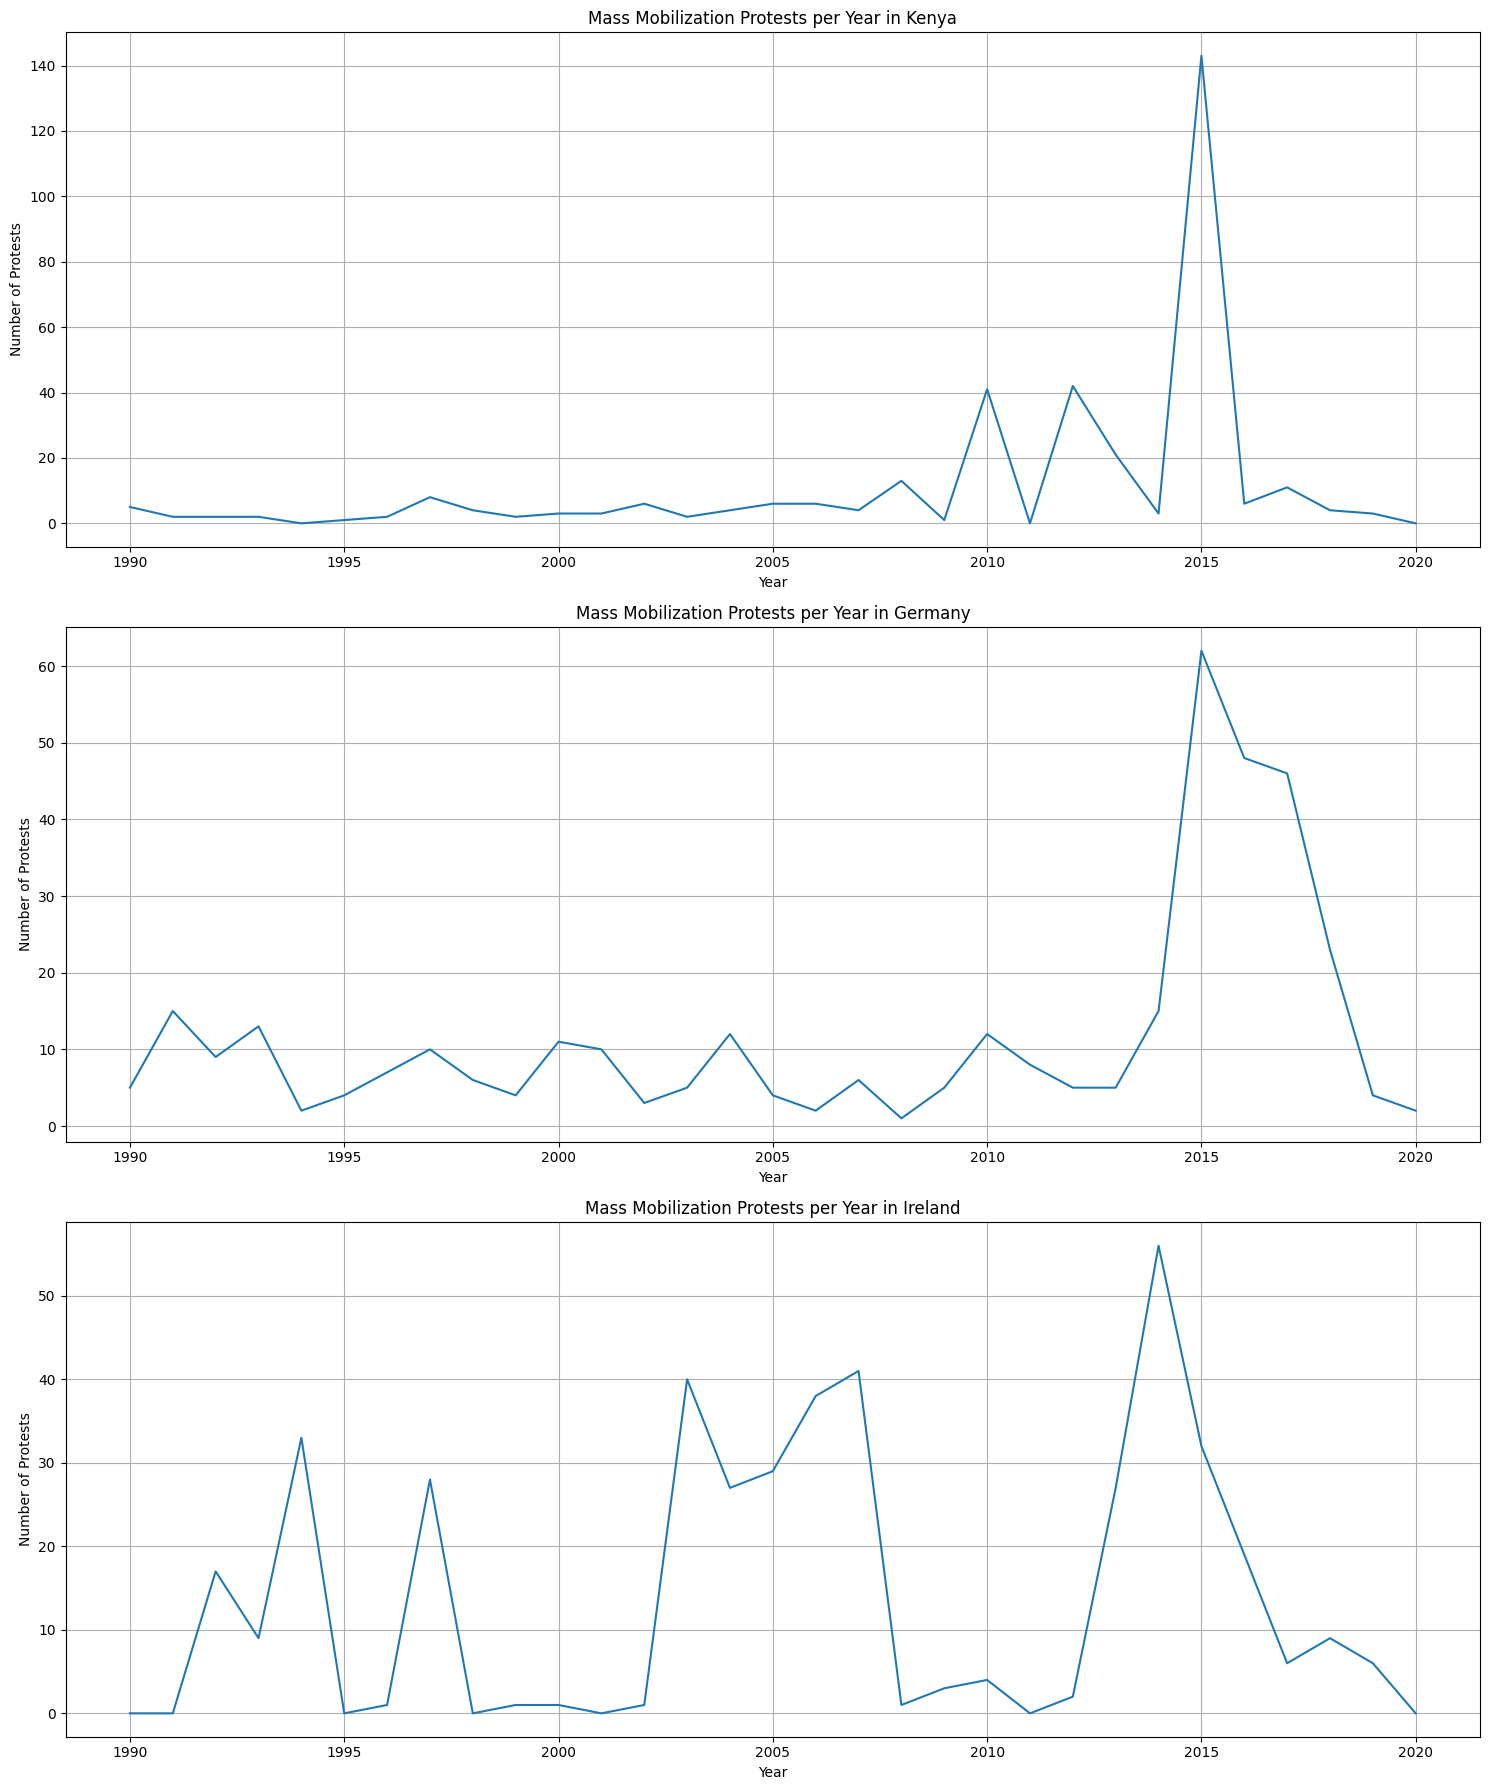

In [39]:
import matplotlib.pyplot as plt

# Select desired countries
countries = ["Kenya", 'Germany', 'Ireland']

# Filter data for these countries
filtered_data = data[data['country'].isin(countries)]

# Group data by country and year, then count protests per year for each country
protest_counts = filtered_data.groupby(['country', 'year']).size().unstack(fill_value=0)

# Create subplots for each country
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))  # Adjust the figsize as needed

for i, country in enumerate(countries):
    protest_counts.T[country].plot(kind='line', ax=axes[i])
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of Protests")
    axes[i].set_title(f"Mass Mobilization Protests per Year in {country}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


* Kenya: In 2015, Kenya documented 140 protests, sparked by a wide range of issues including lack of adequate security, corruption, land-grabbing, unemployment, political reform, and poor road conditions. [Kenya](https://www.article19.org/resources/country-report-protest-in-kenya-2015/)
* Germany: In 2015 there was an increase in protests regarding immigration and the circulation of the white nationalist conspiracy theory of the Great Replacement. [Germany](https://en.wikipedia.org/wiki/2015_European_migrant_crisis#:~:text=There%20was%20an%20increase%20in,theory%20of%20the%20Great%20Replacement.)
* Ireland: The anti-austerity movement in Ireland saw major demonstrations from 2008 (the year of the Irish economic downturn) to 2015. [Ireland](https://en.wikipedia.org/wiki/Anti-austerity_movement_in_Ireland#Background)

### 3.3 MULTIVARIATE ANALYSIS

Multivariate analysis refers to statistical techniques used to analyze data that involves multiple variables simultaneously. The goal is to understand the relationships between more than two variables and to identify patterns or structures in the data.

In [40]:
# Check the columns
data.columns

Index(['region', 'country', 'year', 'start_date', 'end_date',
       'protest_duration', 'participants_numeric', 'protesterviolence',
       'protesteridentity', 'demand_labor wage dispute',
       'demand_land farm issue', 'demand_police brutality',
       'demand_political behavior', 'demand_price increases', 'demand_process',
       'demand_removal of politician', 'demand_social restrictions',
       'demand_tax policy', 'response_accomodation', 'response_arrests',
       'response_beatings', 'response_crowd dispersal', 'response_ignore',
       'response_killings', 'response_shootings', 'sources', 'notes'],
      dtype='object')

In [41]:
# Check the data types of the columns
data.dtypes

region                                  object
country                                 object
year                                     int64
start_date                      datetime64[ns]
end_date                        datetime64[ns]
protest_duration                         int64
participants_numeric                     int64
protesterviolence                        int64
protesteridentity                       object
demand_labor wage dispute                int64
demand_land farm issue                   int64
demand_police brutality                  int64
demand_political behavior                int64
demand_price increases                   int64
demand_process                           int64
demand_removal of politician             int64
demand_social restrictions               int64
demand_tax policy                        int64
response_accomodation                    int64
response_arrests                         int64
response_beatings                        int64
response_crow

Most data types are integers, 4 are objects and 2 are ns.

#### 3.3.1 Correlation Matrix 

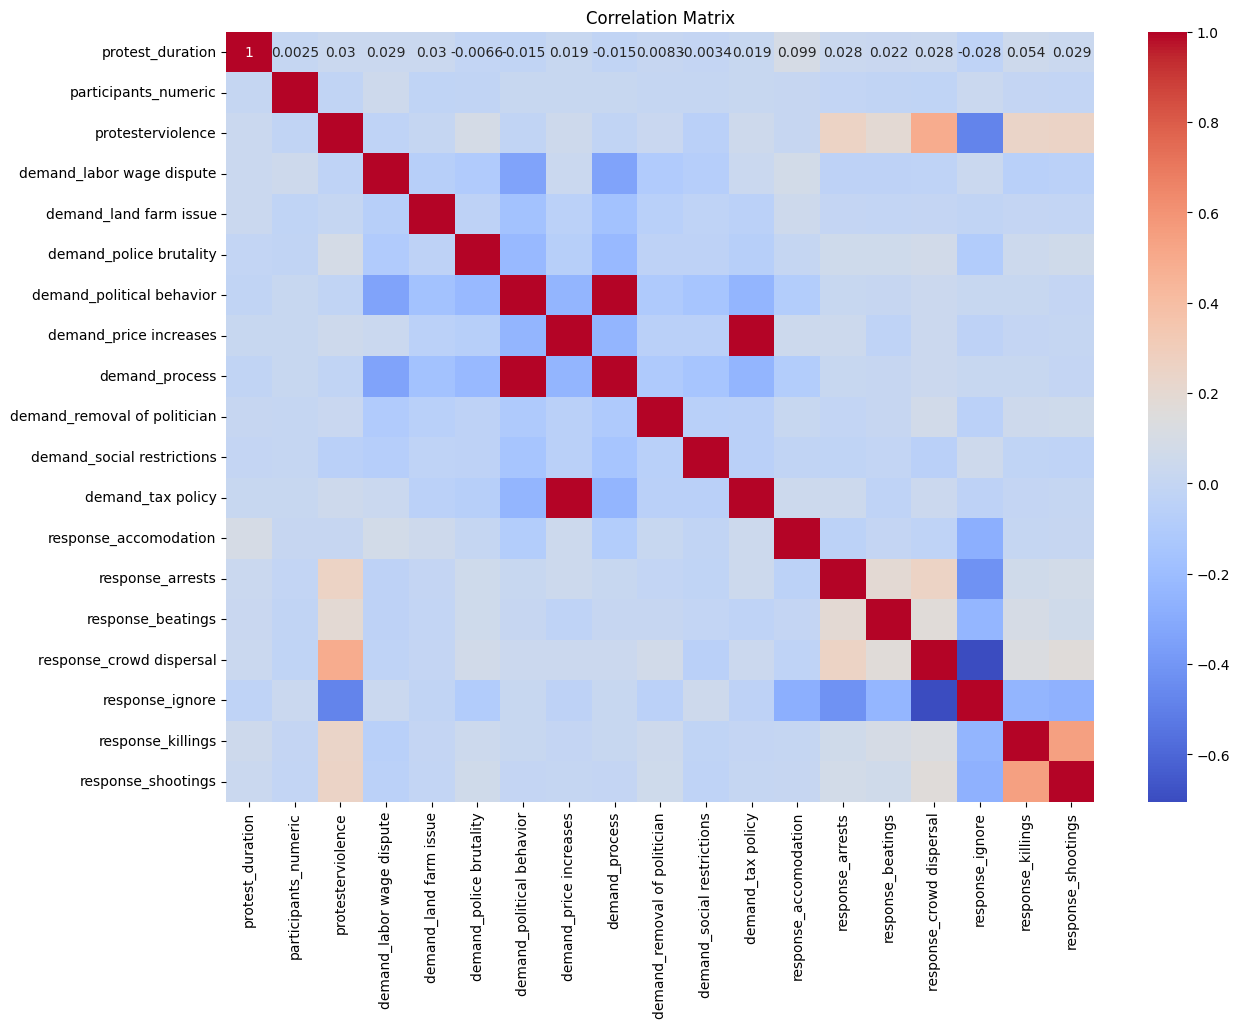

In [42]:
# Define features of interest
features_of_interest = ['protest_duration', 'participants_numeric', 'protesterviolence',
                        'demand_labor wage dispute', 'demand_land farm issue', 'demand_police brutality',
                        'demand_political behavior', 'demand_price increases', 'demand_process',
                        'demand_removal of politician', 'demand_social restrictions', 'demand_tax policy',
                        'response_accomodation', 'response_arrests', 'response_beatings',
                        'response_crowd dispersal', 'response_ignore', 'response_killings', 'response_shootings']

# Exploratory Data Analys
# 1. Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data[features_of_interest].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Key Observations:

**Strong Correlations**:

response_killings and response_shootings have a high positive correlation (0.54), suggesting that protests involving killings often involve shootings as well.
response_ignore and response_crowd dispersal have a strong negative correlation (-0.7), indicating that ignoring a protest is typically not accompanied by crowd dispersal tactics.

**Moderate Correlations**:

participants_numeric and response_crowd dispersal (0.49) show a moderate positive correlation, implying that protests with more participants are more likely to be dispersed by the crowd dispersal response.
protesterviolence and response_arrests (0.24) suggest that violent protests have a moderate tendency to result in arrests.

**Weak Correlations**:

Most demands (e.g., demand_labor wage dispute, demand_land farm issue) show very weak or no significant correlations with other features, indicating that the nature of demands does not strongly predict other responses or characteristics of the protests.
protest_duration shows weak correlations with other features, suggesting the duration of protests is not strongly influenced by the other variables in the dataset.

**Interesting Negative Correlations**:

response_ignore shows notable negative correlations with several responses such as response_arrests (-0.48) and response_crowd dispersal (-0.7), indicating a distinct pattern where protests ignored are less likely to see other active responses.

**Conclusion**:
The correlation matrix reveals the relationships between various aspects of protests, demands, and state responses. Key insights include the co-occurrence of violent responses, the tendency for larger protests to be dispersed, and the mutual exclusivity of ignoring protests and active responses.

#### 3.3.2 Pairplot

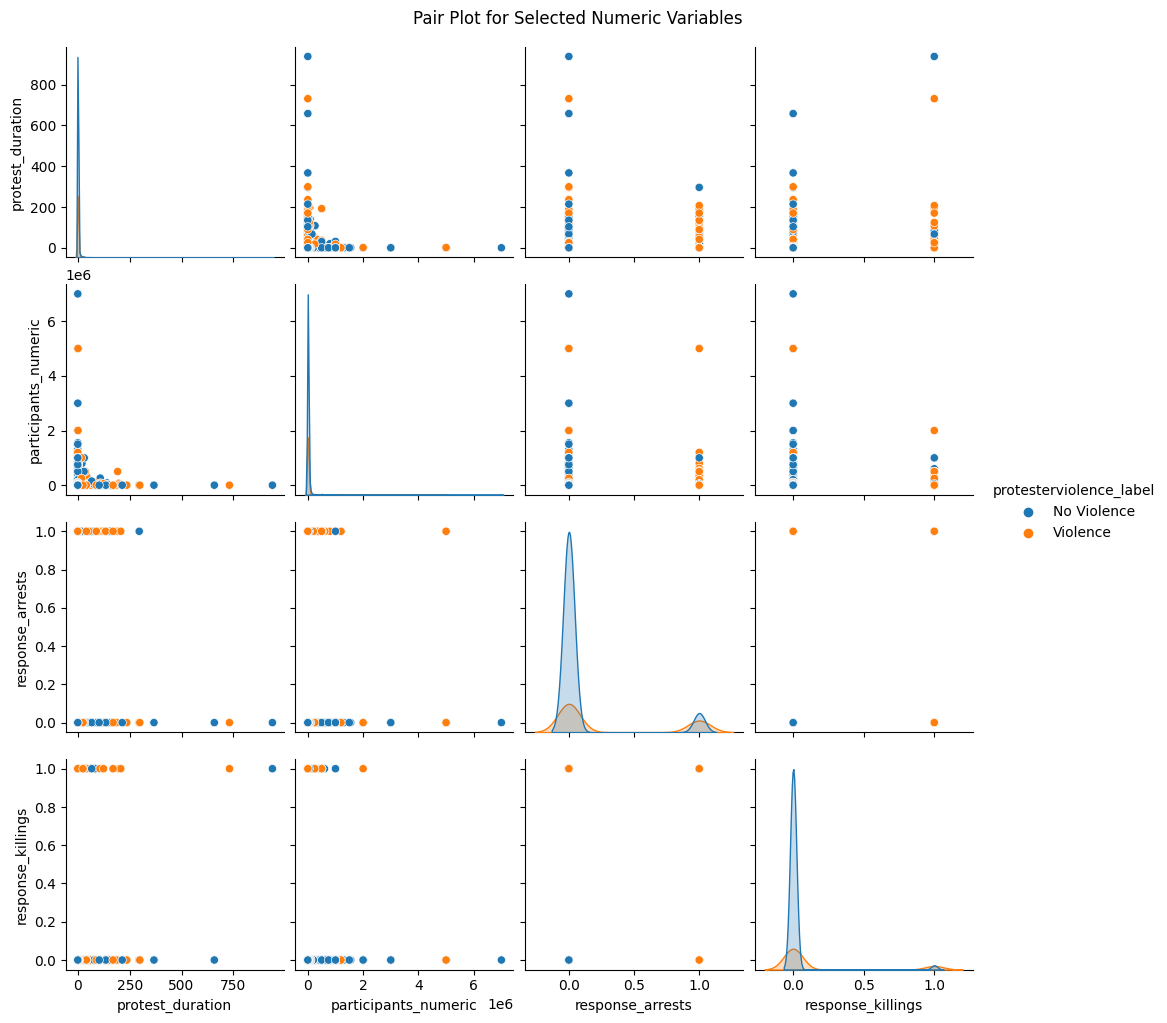

In [43]:
# Map the protesterviolence variable to 'No Violence' and 'Violence'
data['protesterviolence_label'] = data['protesterviolence'].map({0: 'No Violence', 1: 'Violence'})

# Pair plot for selected numeric variables
selected_columns = ['protest_duration', 'participants_numeric', 'protesterviolence_label',
                    'response_arrests', 'response_killings']

pair_plot = sns.pairplot(data[selected_columns], hue='protesterviolence_label', diag_kind='kde', palette='tab10')
pair_plot.fig.suptitle("Pair Plot for Selected Numeric Variables", y=1.02)

plt.show()


Key Observations

1.Protest Duration:

   a)Distribution: Mostly short with few long durations; similar for violent and non-violent protests.
   b)Relationships: No strong links to other variables.
   
2.Participants Numeric:

   a)Distribution:Skewed towards fewer participants; few with very high numbers.
   b)Relationships:
   
       i)Larger protests don't last longer.
       ii)Mixed responses in arrests and killings.
       
3.Protester Violence:

   a)Distribution:Evenly spread.
   b)Relationships:
   
        i)Wide range in participant numbers.
        ii)Higher instances of arrests and killings in violent protests.
4.Response Arrests:

  a)Distribution: Many protests see no arrests; some see significant arrests.
  b)Relationships:
     i)No clear link to protest duration.
     ii)No strong correlation with the number of participants.
5.Response Killings:

  a)Distribution: Rare.
  b)Relationships:
      i)No strong link to protest duration.
      ii)Varying participant numbers.
      
**Insights**
Violence and Response: Violent protests lead to more arrests and killings.

Protest Size and Response: Number of participants doesn't predict duration, arrests, or killings.
Next Steps

Investigate Additional Variables: Explore features like specific demands and government type.

Time Series Analysis: Analyze trends over time for violence and response.

Advanced Modeling: Build models to predict violent outcomes and government responses.







#### 3.3.3 PCA

In [44]:
numeric_features = [feature for feature in features_of_interest if data[feature].dtype in ['int64', 'float64']]
# Filter numeric columns from the original data
data_numeric = data[numeric_features]

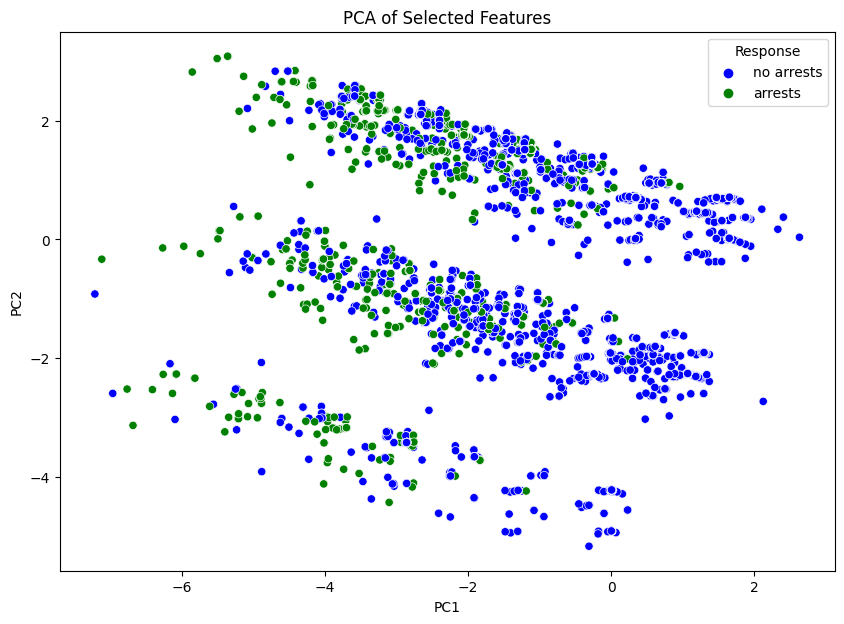

In [45]:
# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_numeric)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Map numerical values to labels
label_mapping = {0: 'no arrests', 1: 'arrests'}
data['response_arrests_label'] = data['response_arrests'].map(label_mapping)

# Ensure the label column is included in df_pca
df_pca = pd.concat([df_pca, data[['response_arrests_label']].reset_index(drop=True)], axis=1)

# Define a custom palette
palette = {'arrests': 'green', 'no arrests': 'blue'}

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='response_arrests_label', palette=palette)
plt.title('PCA of Selected Features')
plt.legend(title='Response')
plt.show()

Key Observations:

**Distribution of Protests**:

The protests are distributed across several clusters in the PCA space, indicating distinct groupings based on the selected features.
The green and blue points are intermixed, suggesting that the response of arrests is not strongly separated in the PCA space.

**Clusters**:

Several horizontal bands can be seen, indicating that protests with similar characteristics (as captured by the PCA) tend to cluster together.
The green points (arrests) are scattered within these bands, indicating that arrests can occur across different types of protests.

**Arrests and Protest Characteristics**:

The lack of clear separation between protests that led to arrests and those that did not suggests that arrests may be influenced by a combination of factors rather than a single identifiable characteristic.

**Conclusion**:
The PCA analysis provides a visual summary of how protests are distributed based on the selected features. The intermixing of arrests and non-arrests suggests that predicting arrests may require considering multiple dimensions and interactions between features. This insight can guide further analysis and modeling efforts to better understand the factors leading to different state responses.

In [46]:
import numpy as np

# Calculate the explained variance by the PCA components
explained_variance = pca.explained_variance_ratio_

# Get the loading scores (importance of each feature to the principal components)
loading_scores = pca.components_.T

# Create a DataFrame for loading scores
loading_scores_df = pd.DataFrame(loading_scores, columns=['PC1', 'PC2'], index=features_of_interest)

# Display the explained variance and loading scores
explained_variance, loading_scores_df


(array([0.14617207, 0.13796478]),
                                    PC1       PC2
 protest_duration             -0.052806 -0.014034
 participants_numeric          0.023665 -0.010538
 protesterviolence            -0.415387  0.106611
 demand_labor wage dispute    -0.001408 -0.243195
 demand_land farm issue       -0.020340 -0.075895
 demand_police brutality      -0.118789 -0.060883
 demand_political behavior     0.132091  0.518851
 demand_price increases       -0.155026 -0.384836
 demand_process                0.132091  0.518851
 demand_removal of politician -0.059706 -0.001337
 demand_social restrictions    0.046408 -0.070048
 demand_tax policy            -0.155026 -0.384836
 response_accomodation        -0.094002 -0.076888
 response_arrests             -0.294110  0.086233
 response_beatings            -0.207776  0.094328
 response_crowd dispersal     -0.428458  0.142861
 response_ignore               0.495455 -0.124573
 response_killings            -0.269050  0.111183
 response_shooti

**Explained Variance**

The explained variance ratio tells us how much of the total variance in the dataset is captured by each principal component:

PC1: 14.62%
PC2: 13.80%
Together, the first two principal components explain approximately 28.42% of the variance in the dataset. This means that nearly one-third of the variability in the data can be represented in a two-dimensional plot, which is helpful for visualization but may not capture all the underlying complexity.

**Loading Scores and Influential Features**

The loading scores indicate the contribution of each feature to the principal components (PC1 and PC2). Here are some key observations:

**Principal Component 1 (PC1)**

protesterviolence (0.415): This feature has the highest positive contribution to PC1. Protests involving violence by protestors are strongly associated with the first principal component.

response_crowd dispersal (0.429): This feature also has a strong positive contribution. This suggests that instances where authorities dispersed crowds are well captured by PC1.

response_ignore (-0.495): This feature has a high negative contribution, indicating that when authorities ignore protests, it is inversely related to PC1.

**Principal Component 2 (PC2)**

demand_political behavior (-0.519) and demand_process (-0.519): These features have the most substantial negative contributions to PC2. Protests demanding changes in political behavior and processes are strongly associated with the second principal component.

demand_price increases (0.385) and demand_tax policy (0.385): Both have high positive contributions to PC2. Protests concerning price increases and tax policies are key factors for this component.

demand_labor wage dispute (0.243): Labor and wage dispute demands also contribute positively to PC2.

**Interpretation**

1.Separation of Protest Characteristics:

PC1 seems to distinguish protests based on the nature of the authorities' responses and the level of protestor violence. High values of PC1 are associated with violent protests and significant crowd dispersal actions by authorities, whereas low values are associated with protests that are largely ignored by authorities.

2.Nature of Demands:

PC2 separates protests based on their demands. High values of PC2 are associated with economic demands (price increases, tax policy, labor disputes), while low values are associated with political behavior and process demands.

**Practical Implications**

Policy Making: Understanding the main drivers behind different types of protests can help policymakers address the underlying issues more effectively.

Law Enforcement: Recognizing the patterns in violent protests versus ignored protests can inform law enforcement strategies and training.

Activism and Advocacy: Insights into which demands are most prominent in protests can guide advocacy groups in framing their campaigns and understanding potential public and governmental responses.

Conclusion
The PCA analysis reveals that protests can be broadly characterized by the nature of the authorities' response and the type of demands made by protestors. These insights can inform more targeted and effective responses from policymakers, law enforcement, and advocacy groups.